# FIT5149 S2 2019 Assessment 1: Predicting Critical Temperature of Super Conductors


Student information
- Family Name: MUSTAFA
- Given Name: ASGHAR
- Student ID: 28905644
- Student email: amus0006@student.monash.edu

Programming Language: R 3.6.1 in Jupyter Notebook

R Libraries used:
- tidyverse
- car
- lattice 
- FSelector
- fpp2
- caret
- glmulti
- dplyr
- xgboost
- FNN

In [ ]:
#install.packages("AICcmodavg")
#library("AICcmodavg")
library(FSelector)
library(tidyverse)
library(car)
library(lattice)
library(fpp2)
library(caret)
library("glmulti")
library(dplyr)
library("xgboost")
library("FNN")

# 1) Introduction

This assignment aims to develop and evaluate different linear models from 80 possible predictor variables for predicting critical temperatures of super conductors. A range of predictors relating to 8 properties of materials, which are than divided into 10 features are used to design, develop and evaluate the models for predicting critical temperatures as accurately as possible. 
These properties include: 

1) Atomic Mass 

2) First Ionization Energy

3) Atomic Radius 

4) Electron Affinity 

5) Fusion Heat 

6) Thermal Conductivity

7) Valence

8) Density

The features considered for each of these properties are: 

1) Mean

2) Weighted Mean

3) Geometric Mean

4) Weighted Geometric Mean

5) Entropy

6) Weighted Entropy

7) Range

8) Weighted Range

9) Standard Deviation

10) Weighted Standard Deviation


In [ ]:
train_data=read.csv("train.csv")
elements=read.csv("unique_m.csv")

head(train_data)

number_of_elements mean_atomic_mass wtd_mean_atomic_mass gmean_atomic_mass
1 4                  88.94447         57.86269             66.36159         
2 5                  92.72921         58.51842             73.13279         
3 4                  88.94447         57.88524             66.36159         
4 4                  88.94447         57.87397             66.36159         
5 4                  88.94447         57.84014             66.36159         
6 4                  88.94447         57.79504             66.36159         
  wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
1 36.11661              1.181795            1.0623955              
2 36.39660              1.449309            1.0577551              
3 36.12251              1.181795            0.9759805              
4 36.11956              1.181795            1.0222909              
5 36.11072              1.181795            1.1292237              
6 36.09893              1.181795            1.2252028              
  range_atomic_mass wtd_range_atomic_mass std_atomic_mass ... wtd_mean_Valence
1 122.9061          31.79492              51.96883        ... 2.257143        
2 122.9061          36.16194              47.09463        ... 2.257143        
3 122.9061          35.74110              51.96883        ... 2.271429        
4 122.9061          33.76801              51.96883        ... 2.264286        
5 122.9061          27.84874              51.96883        ... 2.242857        
6 122.9061          20.68746              51.96883        ... 2.214286        
  gmean_Valence wtd_gmean_Valence entropy_Valence wtd_entropy_Valence
1 2.213364      2.219783          1.368922        1.066221           
2 1.888175      2.210679          1.557113        1.047221           
3 2.213364      2.232679          1.368922        1.029175           
4 2.213364      2.226222          1.368922        1.048834           
5 2.213364      2.206963          1.368922        1.096052           
6 2.213364      2.181543          1.368922        1.141474           
  range_Valence wtd_range_Valence std_Valence wtd_std_Valence critical_temp
1 1             1.085714          0.4330127   0.4370588       29           
2 2             1.128571          0.6324555   0.4686063       26           
3 1             1.114286          0.4330127   0.4446966       19           
4 1             1.100000          0.4330127   0.4409521       22           
5 1             1.057143          0.4330127   0.4288095       23           
6 1             1.000000          0.4330127   0.4103259       23

In [ ]:
dim(train_data)

[1] 21263    82

# 2) Exploratory Data Analysis

In the first phase, a comprehensive exploratory data analysis of predictor variables, dependent variables was performed to gain insights about the data. This includes, producing summary statistics, correlation analysis of all variables (dependent and independent) and feature analysis using scatter plot, box plot and qqplots.

## 2.1) Summary Statistics

The summary statistics and histogram below shows Distrubtion of critical temperatures in the provided training data set. 

 critical_temp      
 Min.   :  0.00021  
 1st Qu.:  5.36500  
 Median : 20.00000  
 Mean   : 34.42122  
 3rd Qu.: 63.00000  
 Max.   :185.00000  

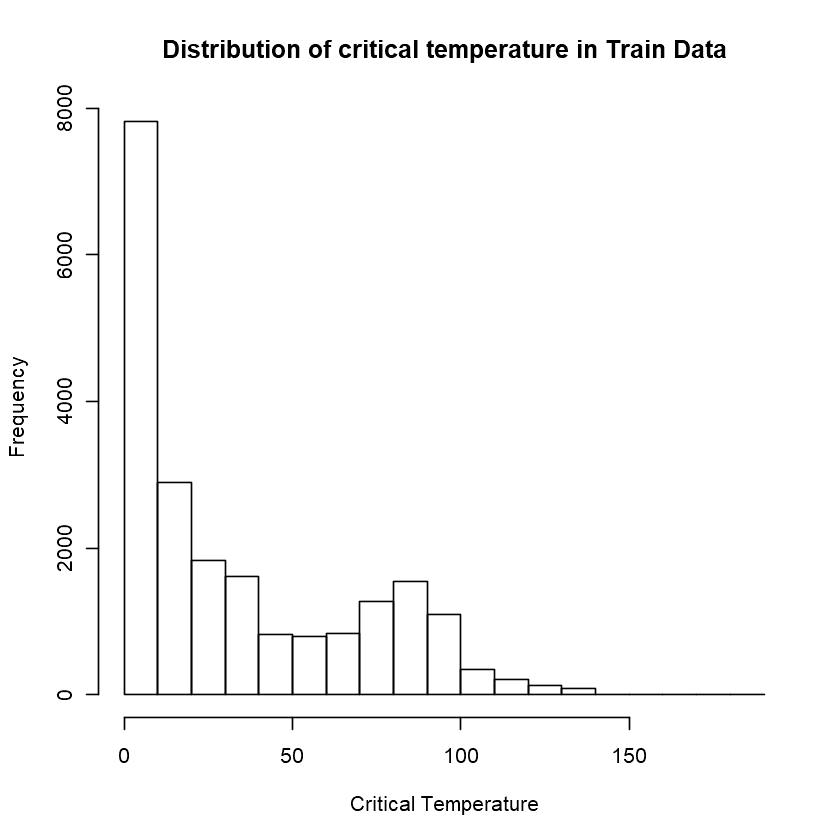

In [ ]:
summary(train_data["critical_temp"])
hist(train_data[,82],main="Distribution of critical temperature in Train Data",xlab="Critical Temperature")

From the above distribution of critical temperatures of the given training data set, we can see that mostly the critical temperatures are on the lower side, which makes this distribution heavily right skewed. This is further validated by the above statistical summary where Mean (34) is significantly greater than the median (20). Moreover, the critical temperatures also appear to be bimodal with a small peak between 80-90 degrees.

Next we obtain the statistical summary of each of the 82 variables for further analysis (as below).

In [ ]:
summary(train_data)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

This shows that most of these features donot have the same median and the mode indicating presence of outliers and departure from normality in their own (frequency) distributions.

## 2.2) Correlation Analysis

We obtain the correlation matrix for all combinations of the 82 variables (3321 combinations in total) for deducing possible multi collinearity and their possible inter dependency between the predictor variables.
The table below shows the correlation between each predictor variable for all features in the training data.

In [ ]:
# Return the correlations between each of the predictors,
# in descending order of magnitude.
cor_ <- as.data.frame.table(cor(train_data[ , -(ncol(train_data)+1)]))
colnames(cor_) <- c("a", "b", "cor")
cor_ <- cor_[cor_$a != cor_$b, ]
cor_ <- cor_[order(abs(cor_$cor), decreasing = TRUE), ]
cor_ <- cor_[seq(1, nrow(cor_), 2), ]
cor_$cor <- round(cor_$cor, 2)
rownames(cor_) <- 1:nrow(cor_)
cor_

a                               b                         cor 
1    entropy_atomic_radius           entropy_fie               1.00
2    wtd_gmean_Valence               wtd_mean_Valence          0.99
3    entropy_Valence                 entropy_fie               0.99
4    wtd_gmean_fie                   wtd_mean_fie              0.99
5    gmean_Valence                   mean_Valence              0.99
6    entropy_Valence                 entropy_atomic_radius     0.99
7    std_ThermalConductivity         range_ThermalConductivity 0.99
8    std_FusionHeat                  range_FusionHeat          0.98
9    std_fie                         range_fie                 0.98
10   wtd_gmean_atomic_radius         wtd_mean_atomic_radius    0.98
11   std_Valence                     range_Valence             0.97
12   entropy_fie                     number_of_elements        0.97
13   std_ElectronAffinity            range_ElectronAffinity    0.97
14   entropy_atomic_radius           entropy_atomic_mass       0.97
15   entropy_atomic_radius           number_of_elements        0.97
16   wtd_gmean_FusionHeat            wtd_mean_FusionHeat       0.97
17   gmean_fie                       mean_fie                  0.97
18   entropy_Valence                 number_of_elements        0.97
19   std_atomic_radius               range_atomic_radius       0.97
20   wtd_std_ThermalConductivity     range_ThermalConductivity 0.97
21   entropy_fie                     entropy_atomic_mass       0.96
22   wtd_gmean_atomic_mass           wtd_mean_atomic_mass      0.96
23   entropy_Valence                 entropy_atomic_mass       0.96
24   wtd_entropy_atomic_radius       wtd_entropy_atomic_mass   0.96
25   std_atomic_mass                 range_atomic_mass         0.96
26   std_Density                     range_Density             0.96
27   wtd_std_atomic_radius           range_atomic_radius       0.96
28   wtd_std_ThermalConductivity     std_ThermalConductivity   0.96
29   wtd_gmean_Density               gmean_Density             0.95
30   wtd_entropy_Valence             wtd_entropy_atomic_radius 0.95
...  ...                             ...                       ... 
3292 mean_ElectronAffinity           wtd_std_fie               0   
3293 std_Valence                     wtd_mean_atomic_mass      0   
3294 std_FusionHeat                  gmean_Density             0   
3295 wtd_mean_Valence                mean_atomic_radius        0   
3296 wtd_range_ThermalConductivity   gmean_atomic_radius       0   
3297 mean_ThermalConductivity        range_FusionHeat          0   
3298 range_FusionHeat                wtd_std_atomic_mass       0   
3299 wtd_std_Density                 wtd_range_atomic_mass     0   
3300 range_FusionHeat                wtd_mean_fie              0   
3301 range_Density                   wtd_mean_atomic_mass      0   
3302 wtd_range_ElectronAffinity      gmean_fie                 0   
3303 wtd_gmean_ElectronAffinity      gmean_Density             0   
3304 mean_ElectronAffinity           range_atomic_mass         0   
3305 mean_atomic_radius              number_of_elements        0   
3306 wtd_gmean_FusionHeat            gmean_fie                 0   
3307 wtd_std_Valence                 entropy_Density           0   
3308 entropy_FusionHeat              gmean_atomic_radius       0   
3309 wtd_entropy_ThermalConductivity wtd_range_atomic_radius   0   
3310 wtd_gmean_ElectronAffinity      wtd_entropy_atomic_radius 0   
3311 mean_FusionHeat                 mean_fie                  0   
3312 mean_atomic_radius              range_atomic_mass         0   
3313 wtd_std_Valence                 gmean_Density             0   
3314 std_FusionHeat                  wtd_gmean_fie             0   
3315 std_Valence                     wtd_gmean_fie             0   
3316 mean_atomic_radius              std_atomic_mass           0   
3317 entropy_ThermalConductivity     std_fie                   0   
3318 mean_ElectronAffinity           std_atomic_radius       

In [ ]:
# Calculating number of correlations with possible multi collinearity (abs(cor)>=0.8)
cor=as.data.frame(cor_)
print(sum((abs(cor$cor)>=0.8)==TRUE))
mean(abs(cor$cor))
#mean(abs(cor_temp[cor_temp$cor_temp>0,]))

Moreover, correlations of all 82 features with critical temperature was also calculated for further evaluation.

In [ ]:
cor_temp=cor(train_data[ , -(ncol(train_data)+1)],train_data$critical_temp)
cor_temp <- cor_temp[order(abs(cor_temp), decreasing = TRUE), ]
as.data.frame(cor_temp)

cor_temp   
critical_temp                    1.0000000 
wtd_std_ThermalConductivity      0.7212711 
range_ThermalConductivity        0.6876539 
range_atomic_radius              0.6537590 
std_ThermalConductivity          0.6536320 
wtd_mean_Valence                -0.6324010 
wtd_entropy_atomic_mass          0.6269304 
wtd_gmean_Valence               -0.6156533 
wtd_entropy_atomic_radius        0.6034940 
number_of_elements               0.6010686 
range_fie                        0.6007904 
mean_Valence                    -0.6000849 
wtd_std_atomic_radius            0.5991987 
entropy_Valence                  0.5985909 
wtd_entropy_Valence              0.5896637 
wtd_std_fie                      0.5820133 
gmean_Valence                   -0.5730681 
entropy_fie                      0.5678169 
wtd_entropy_FusionHeat           0.5632443 
std_atomic_radius                0.5596286 
entropy_atomic_radius            0.5589374 
entropy_FusionHeat               0.5527087 
entropy_atomic_mass              0.5436194 
std_fie                          0.5418038 
gmean_Density                   -0.5416844 
wtd_gmean_Density               -0.5400456 
range_atomic_mass                0.4919698 
wtd_range_ThermalConductivity    0.4695716 
entropy_Density                  0.4571694 
wtd_range_Valence               -0.4399008 
...                             ...        
wtd_std_ElectronAffinity         0.31514734
wtd_range_FusionHeat            -0.31417848
wtd_mean_atomic_mass            -0.31227202
wtd_range_fie                    0.30048245
wtd_std_Valence                 -0.30002801
wtd_mean_atomic_radius          -0.29727212
wtd_range_Density               -0.28472937
range_ElectronAffinity           0.27970455
std_ElectronAffinity             0.26210348
range_Density                    0.26053562
wtd_entropy_ElectronAffinity     0.23764782
gmean_atomic_mass               -0.23034537
std_Valence                     -0.20807162
wtd_std_Density                  0.20766315
std_FusionHeat                  -0.20131006
wtd_std_FusionHeat              -0.19557117
mean_ElectronAffinity           -0.19355049
wtd_range_ElectronAffinity       0.18534849
gmean_atomic_radius             -0.14377022
range_Valence                   -0.14354639
range_FusionHeat                -0.14071369
wtd_entropy_ThermalConductivity -0.11672759
std_Density                      0.11524263
mean_atomic_mass                -0.11352325
wtd_mean_ElectronAffinity        0.11151585
wtd_gmean_ElectronAffinity      -0.10735929
mean_atomic_radius               0.10527269
mean_fie                         0.10226805
entropy_ThermalConductivity      0.08586207
gmean_fie                       -0.02510325

In [ ]:
cor_temp=as.data.frame(cor_temp)
#abs(cor_temp$cor_temp)!=1
#cor_temp$cor_temp
mean(abs(cor_temp[cor_temp$cor_temp!=1,]))

A heat map of the correlation matrix was also derived to present a sense of present correlations within the data.

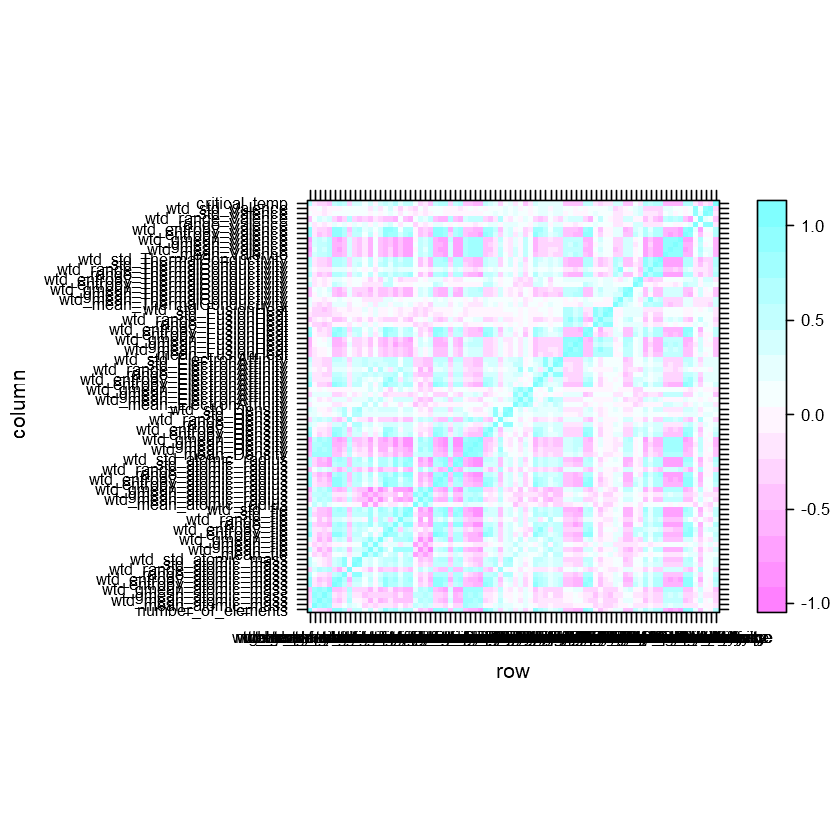

In [ ]:
levelplot(cor(train_data[ , -(ncol(train_data)+1)]))

This heat map of correlation matrix shows large region with high level of correlations between the dependent variables which could play a significant part in model design.

## 2.3) Feature Analysis

Than, distribution plots including scatter plot, box plot and qq plots for each of the 80 variables were made to evaluate their independent distributions and their interaction with the dependent variable (Critical Temperature) 


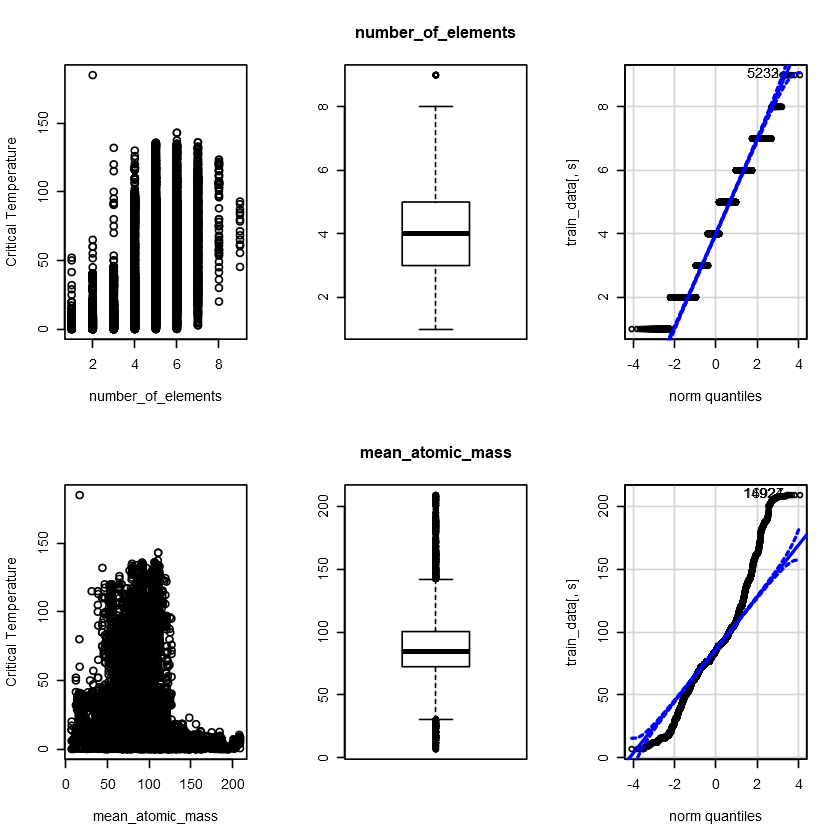

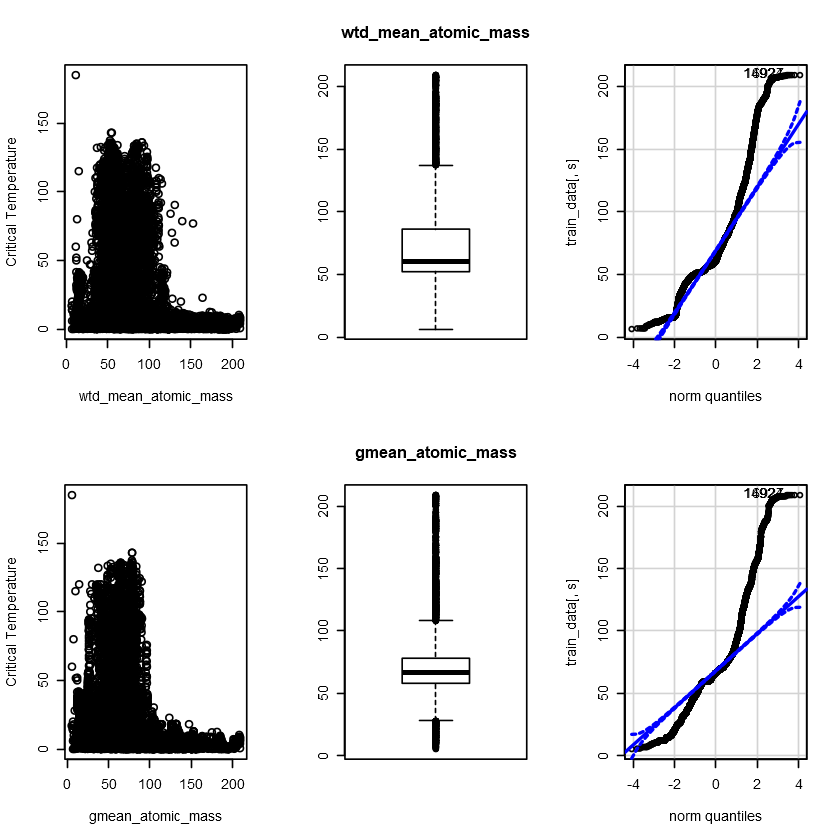

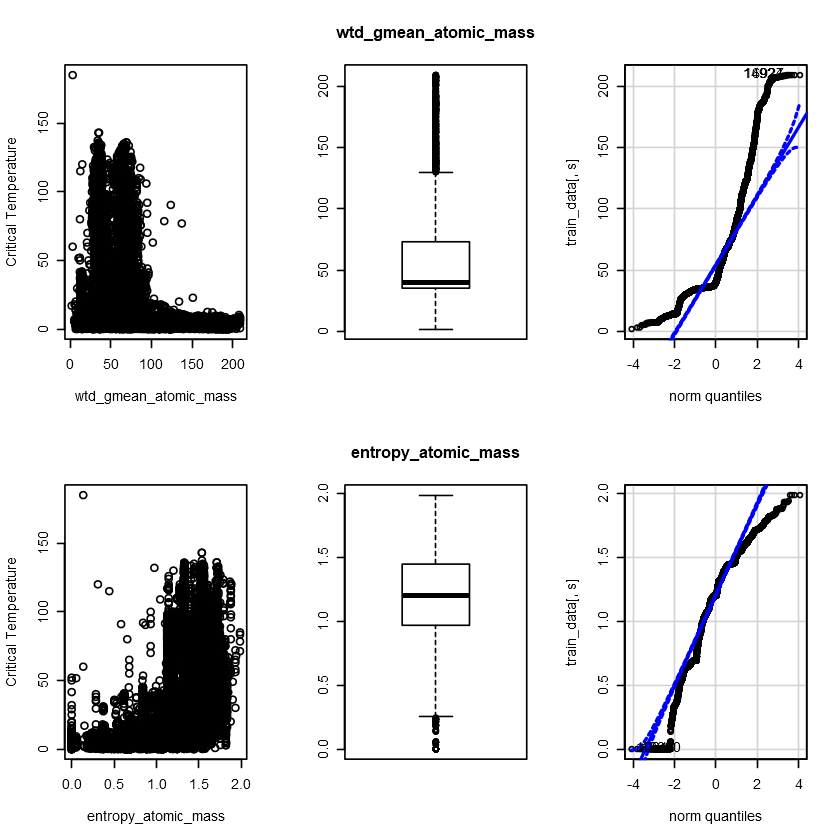

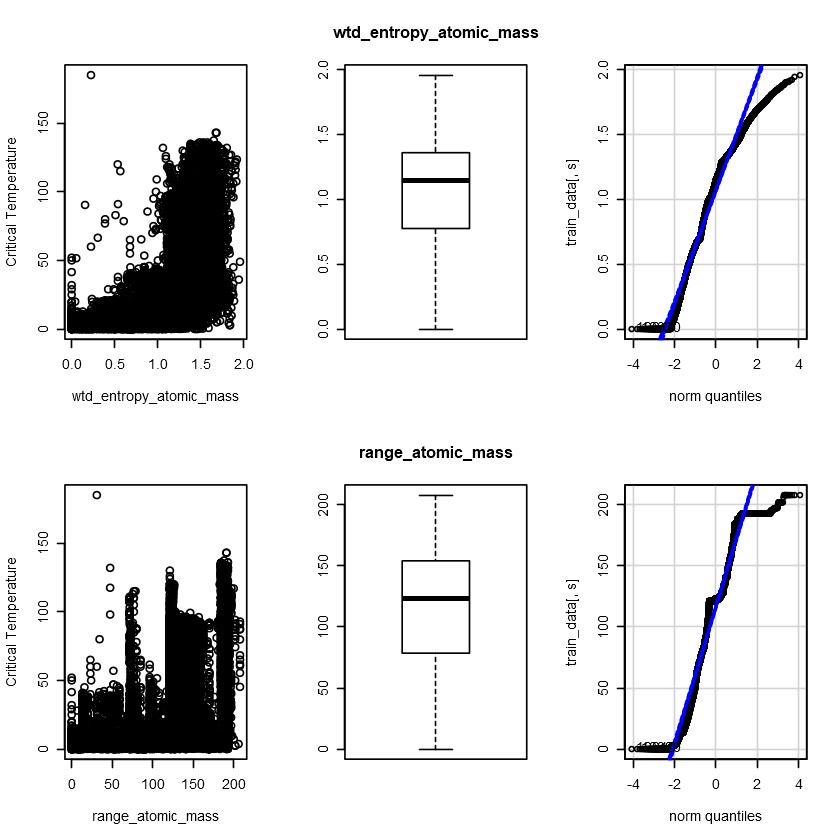

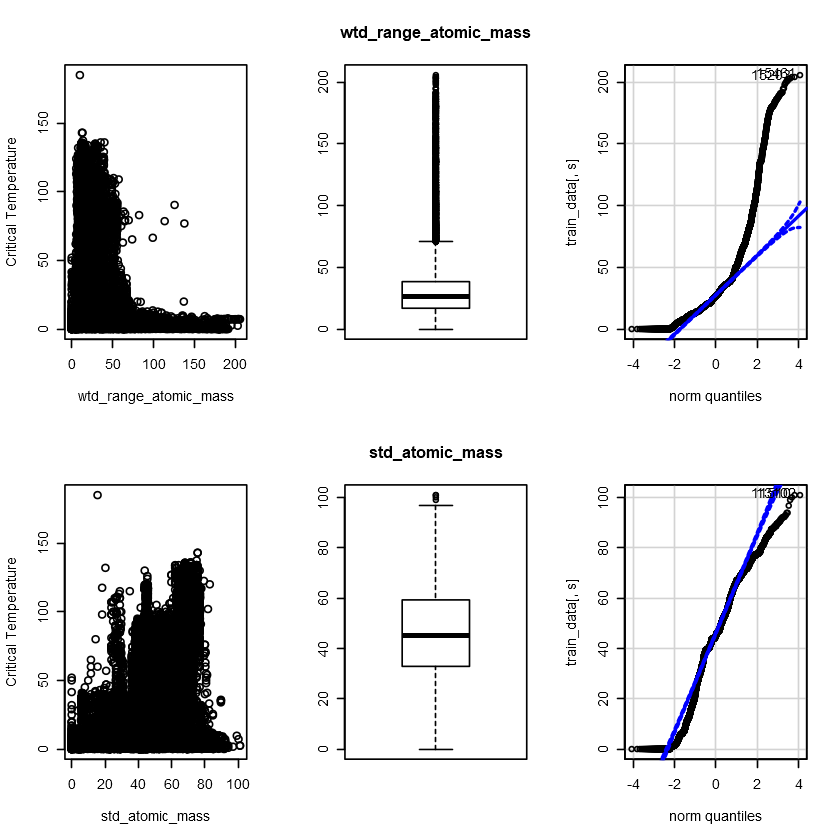

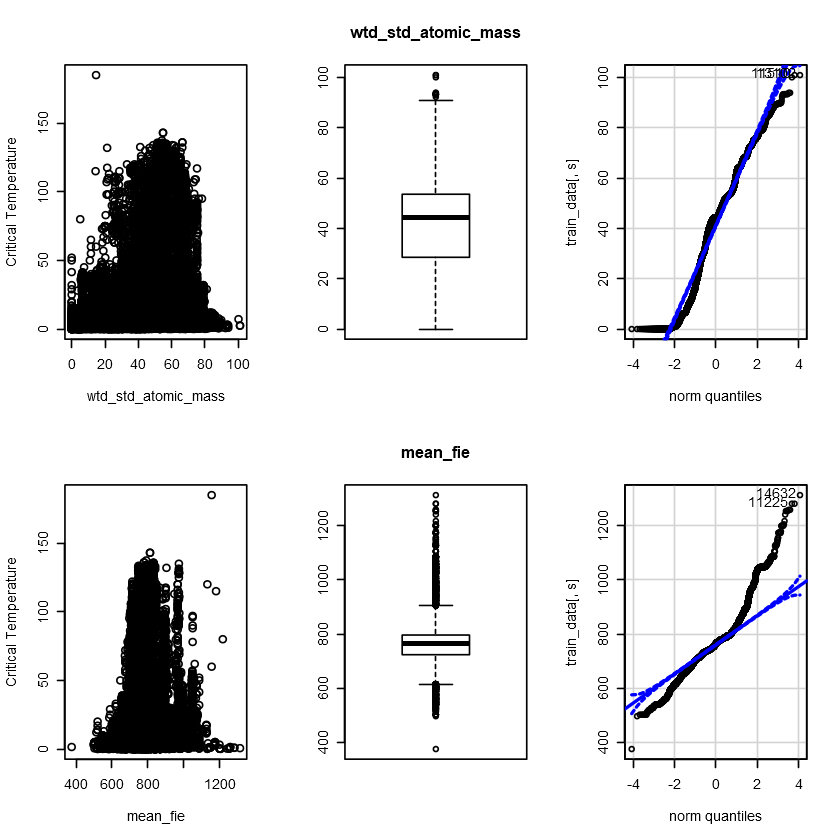

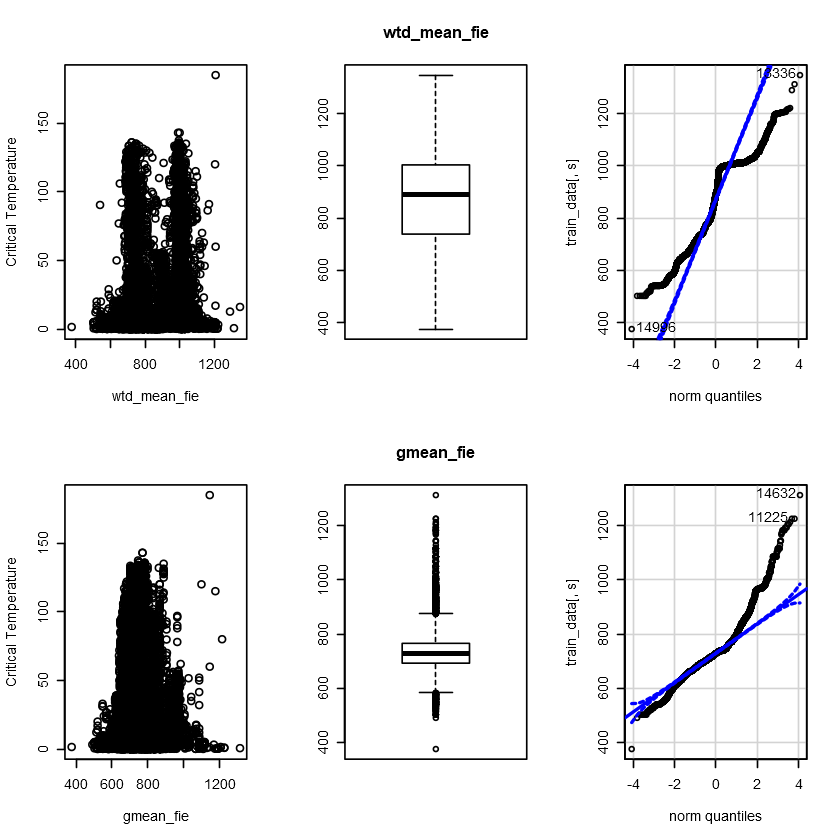

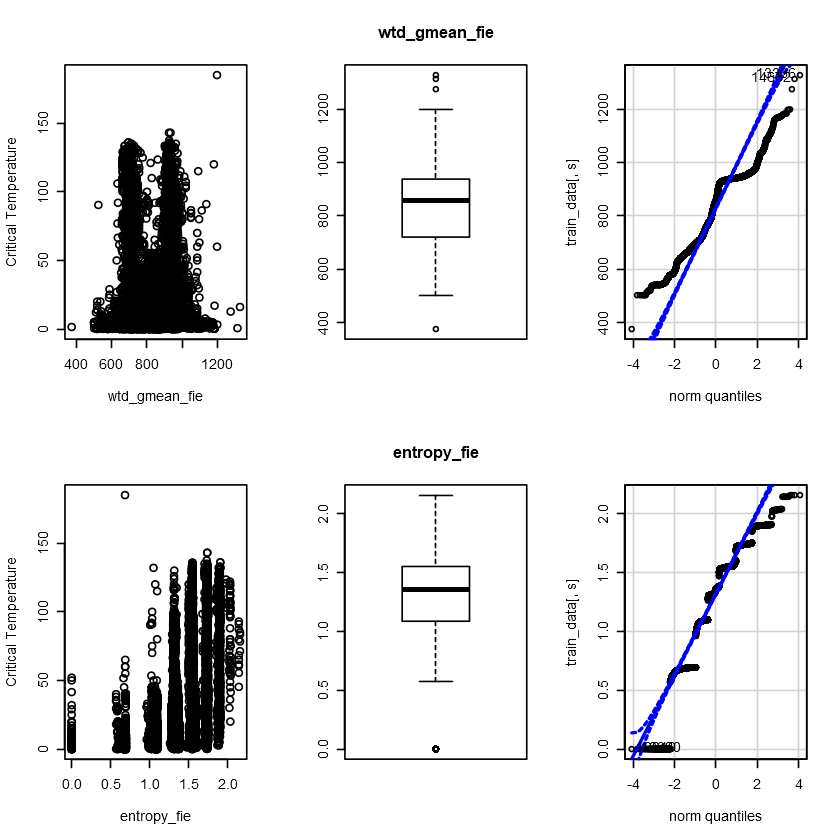

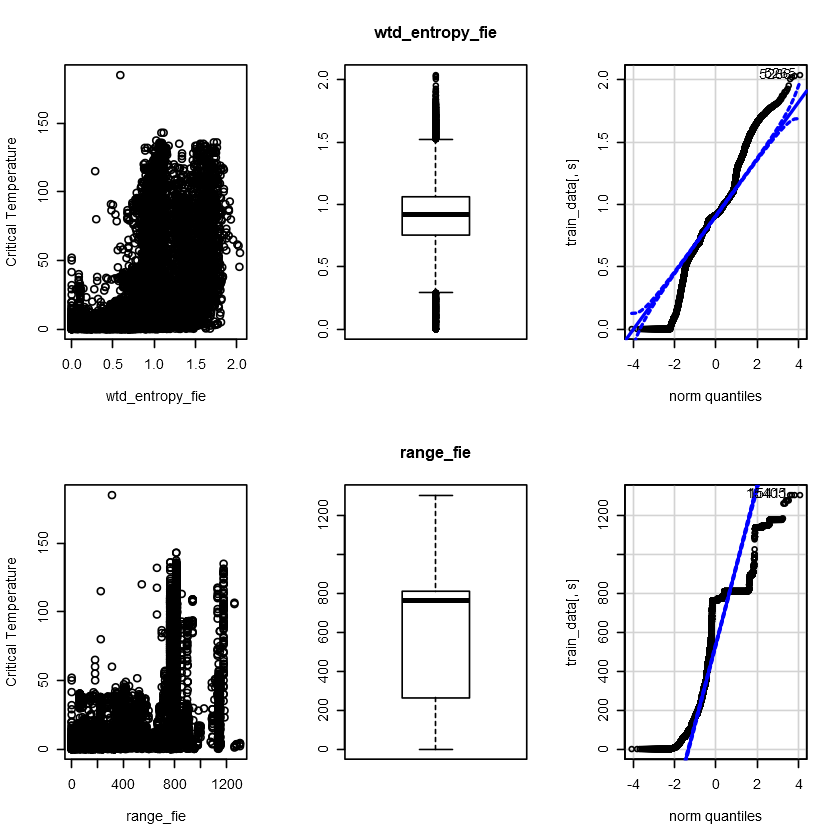

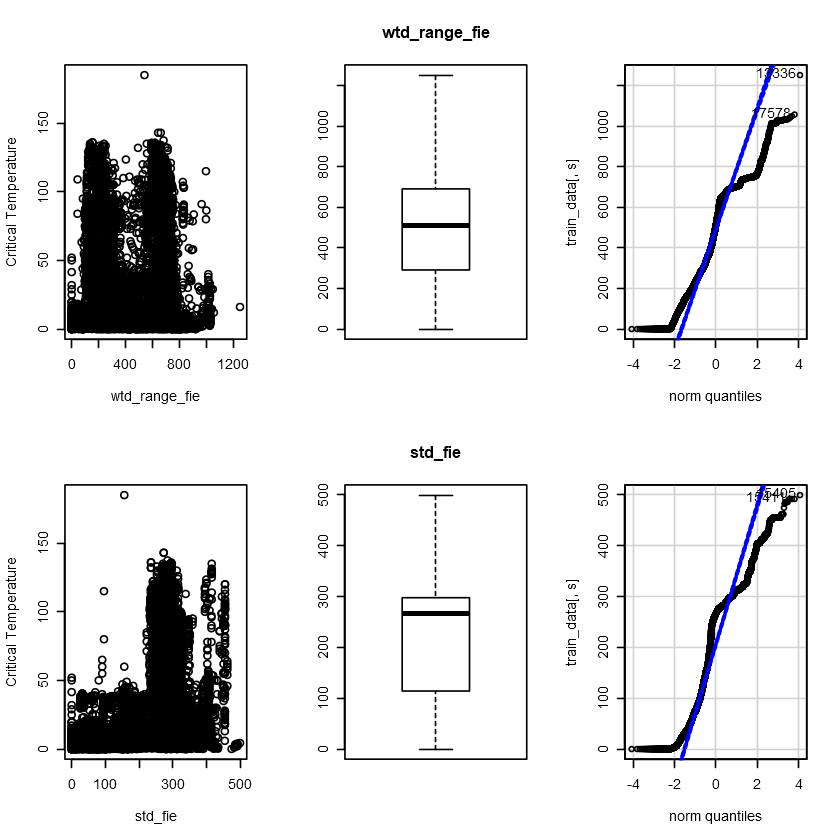

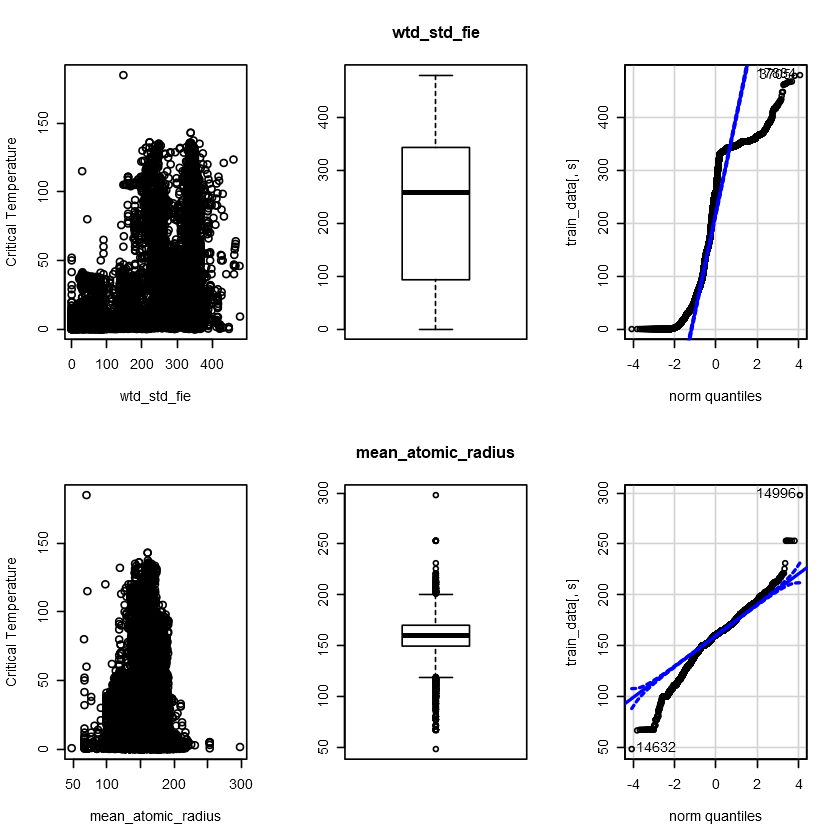

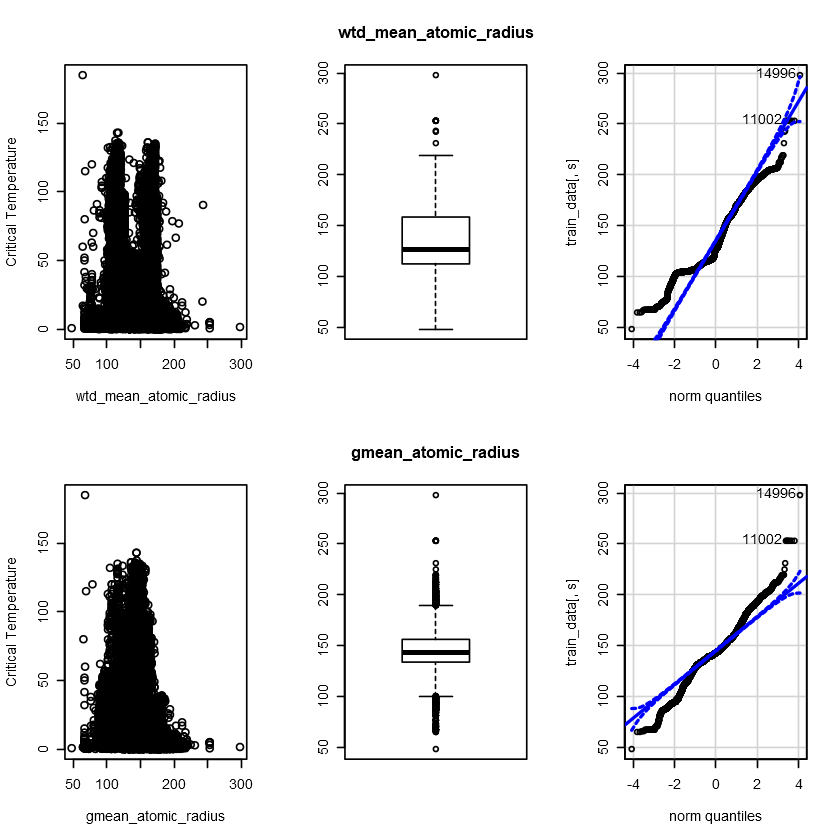

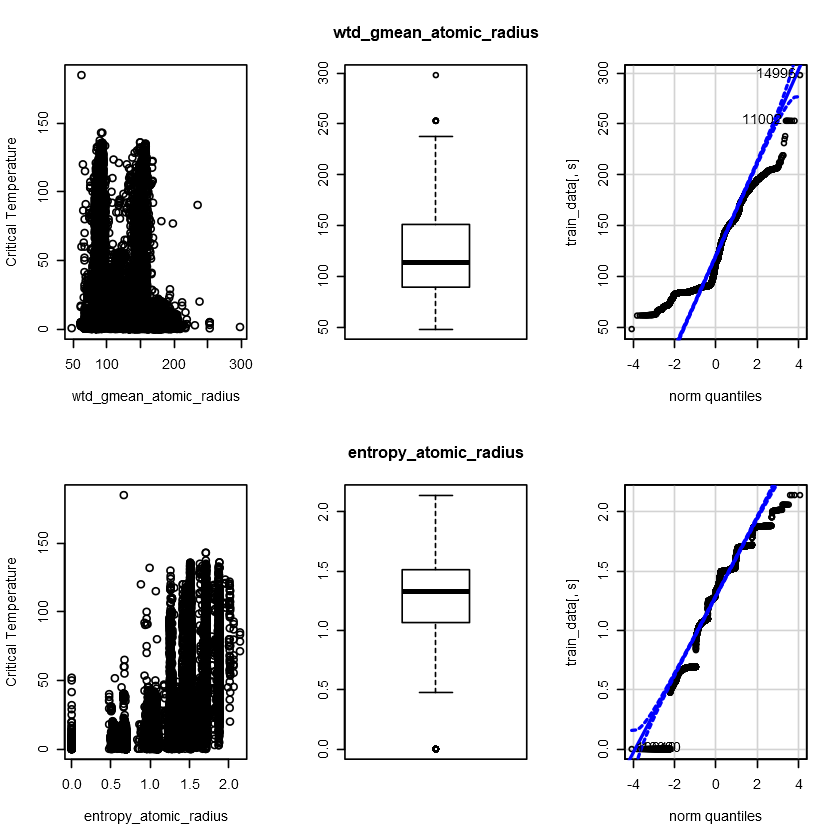

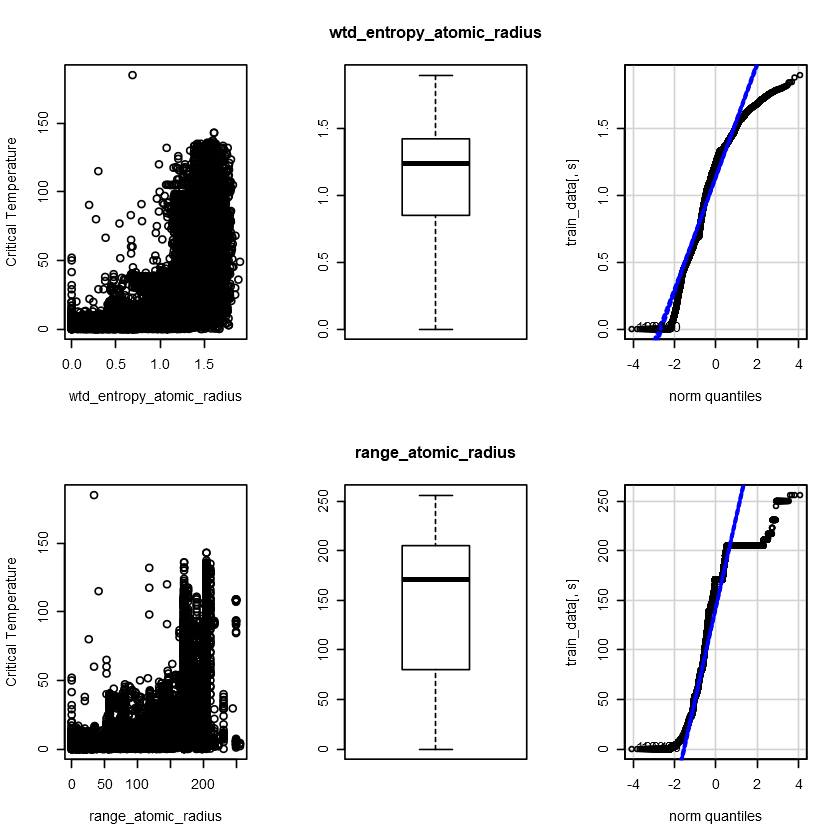

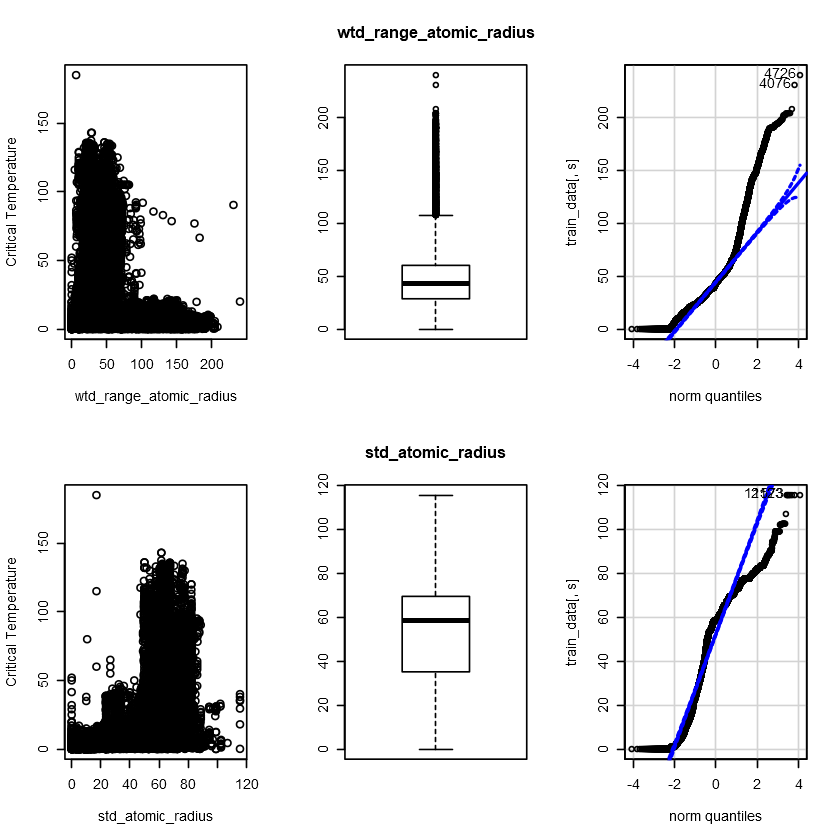

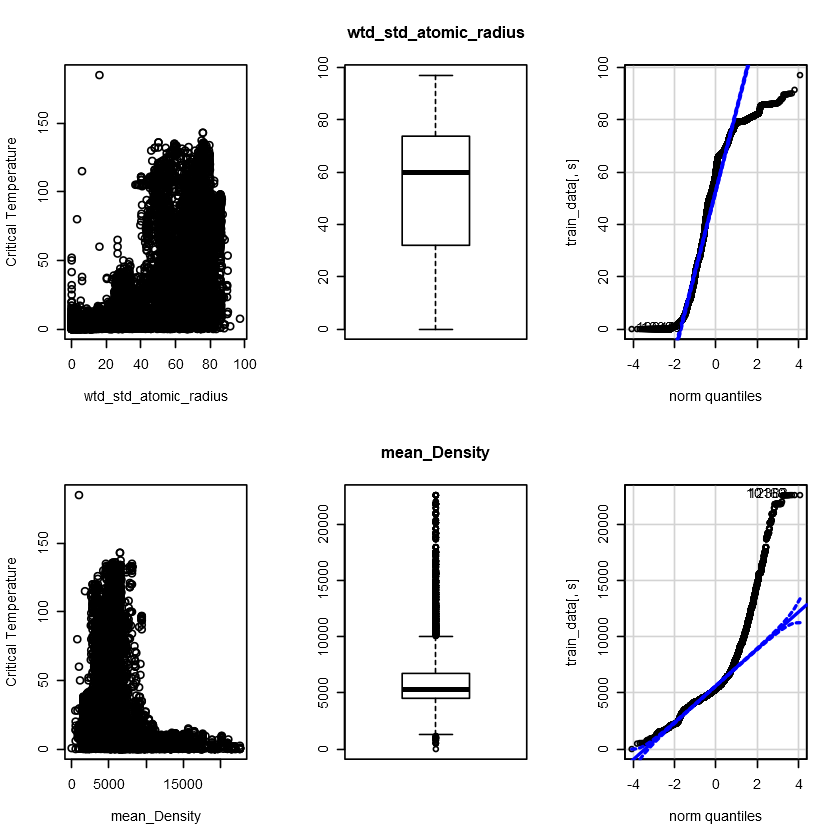

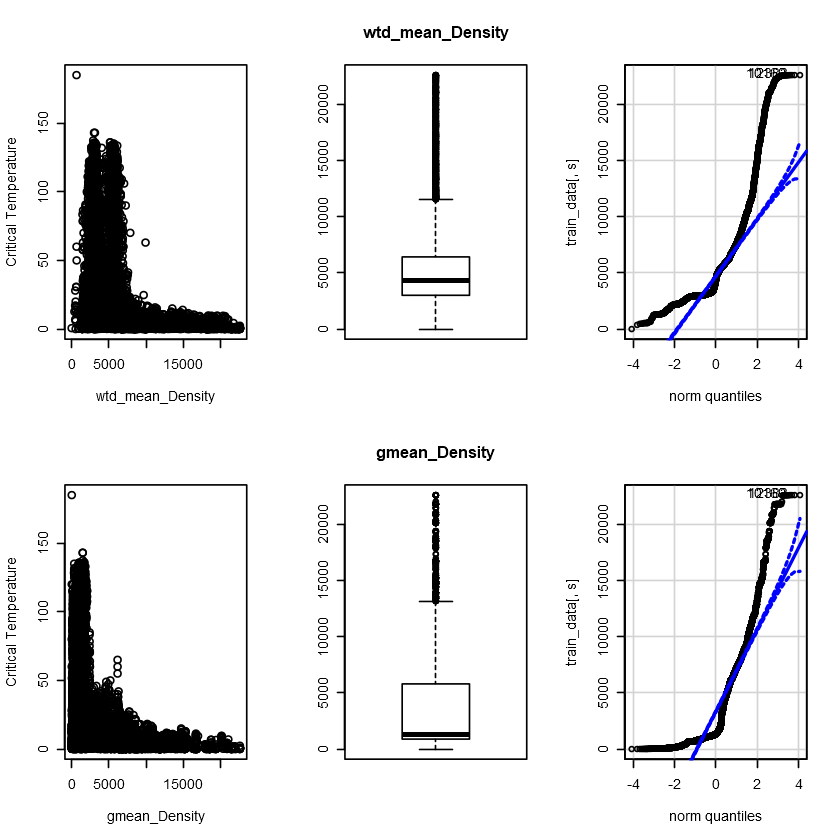

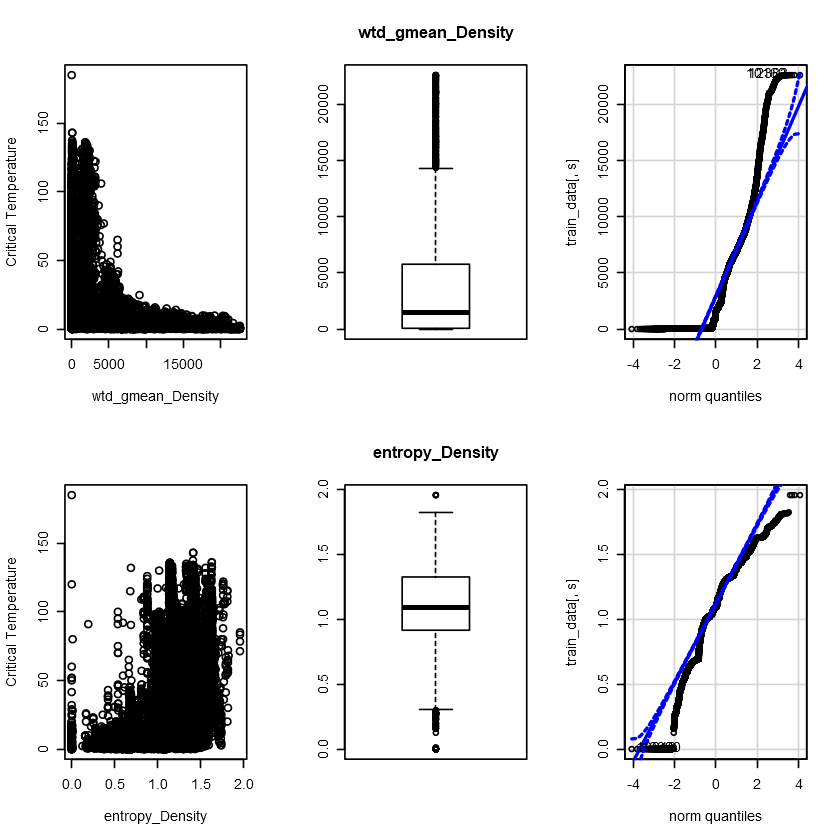

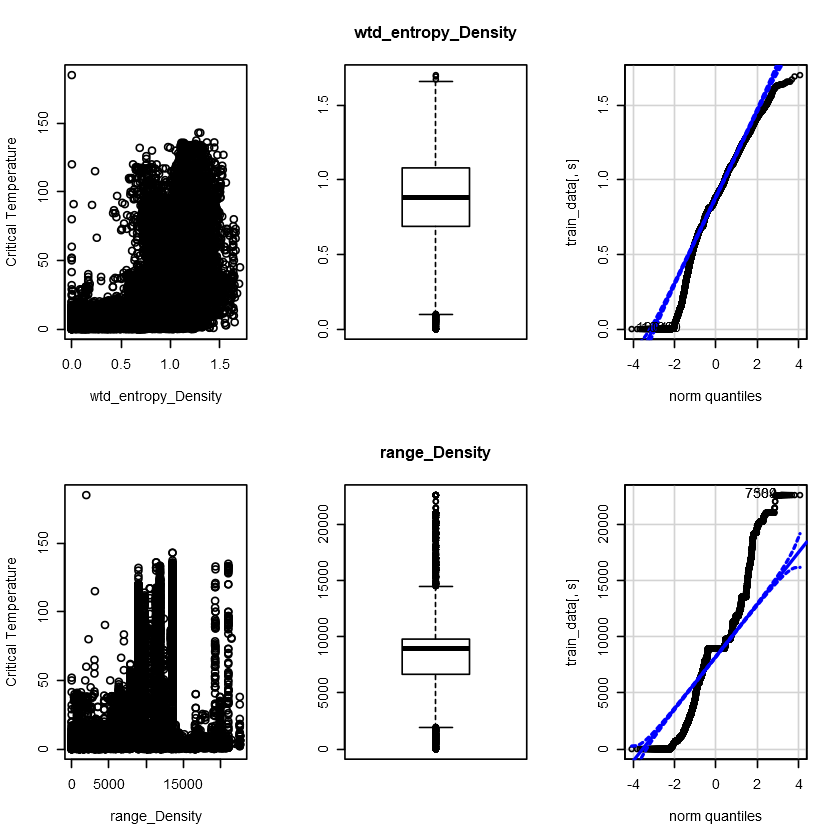

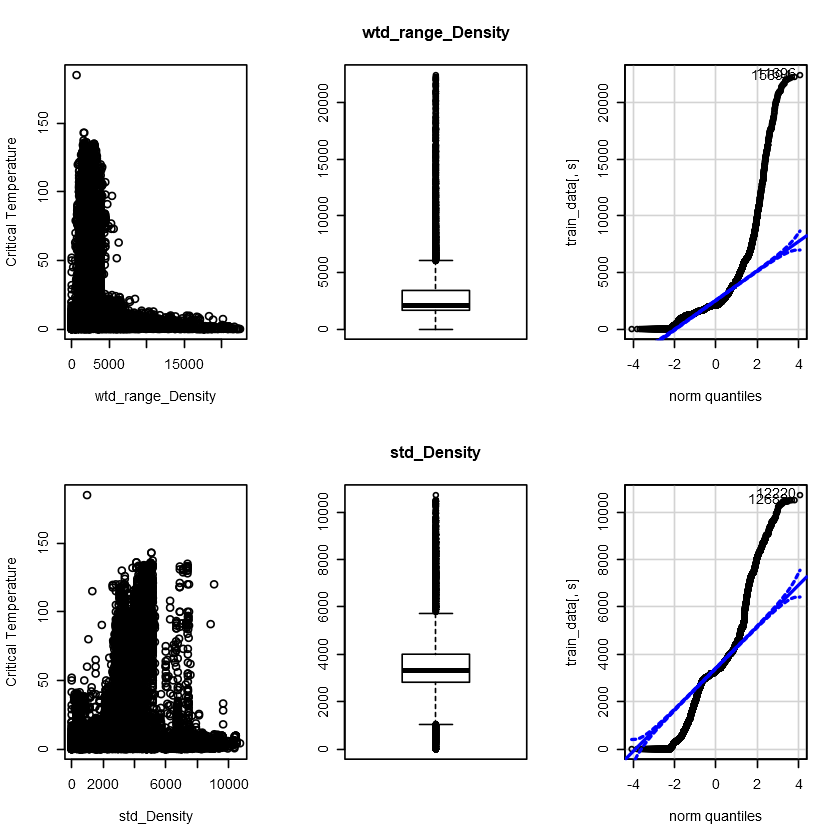

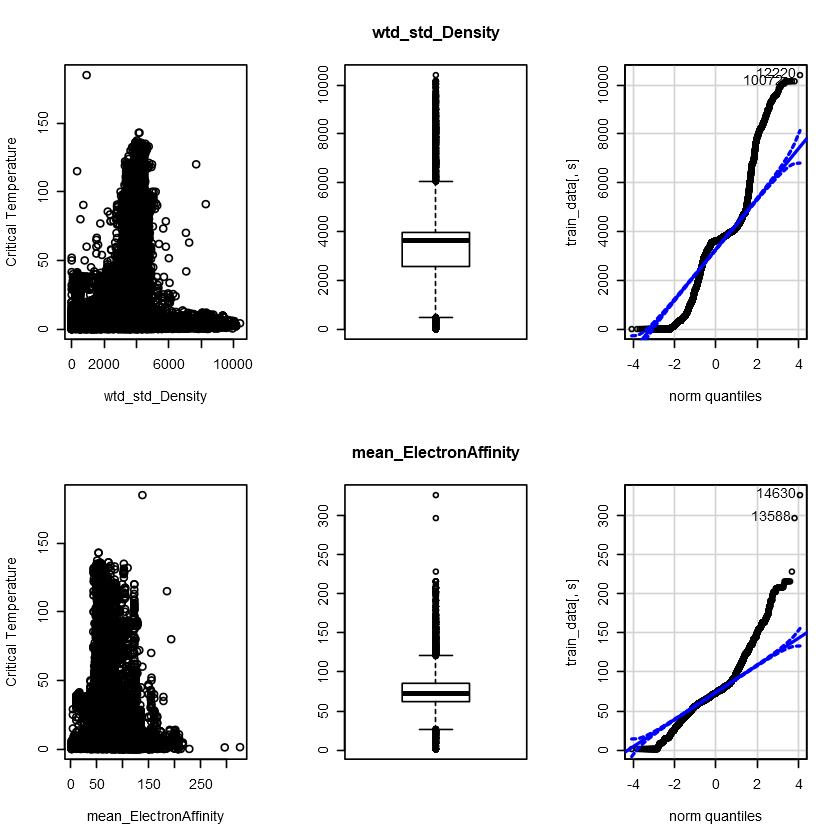

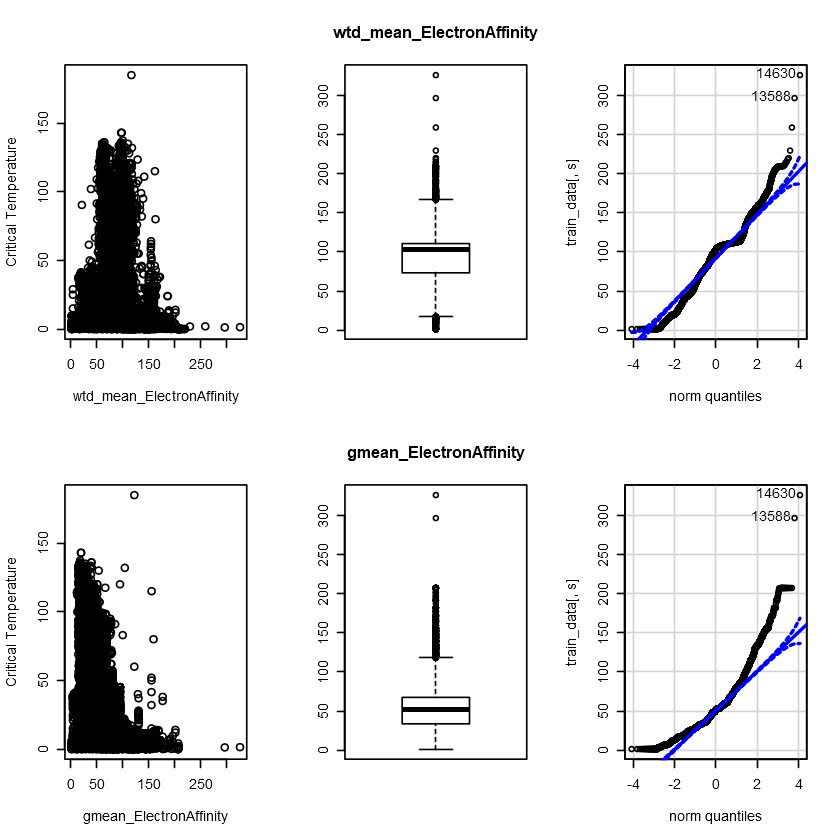

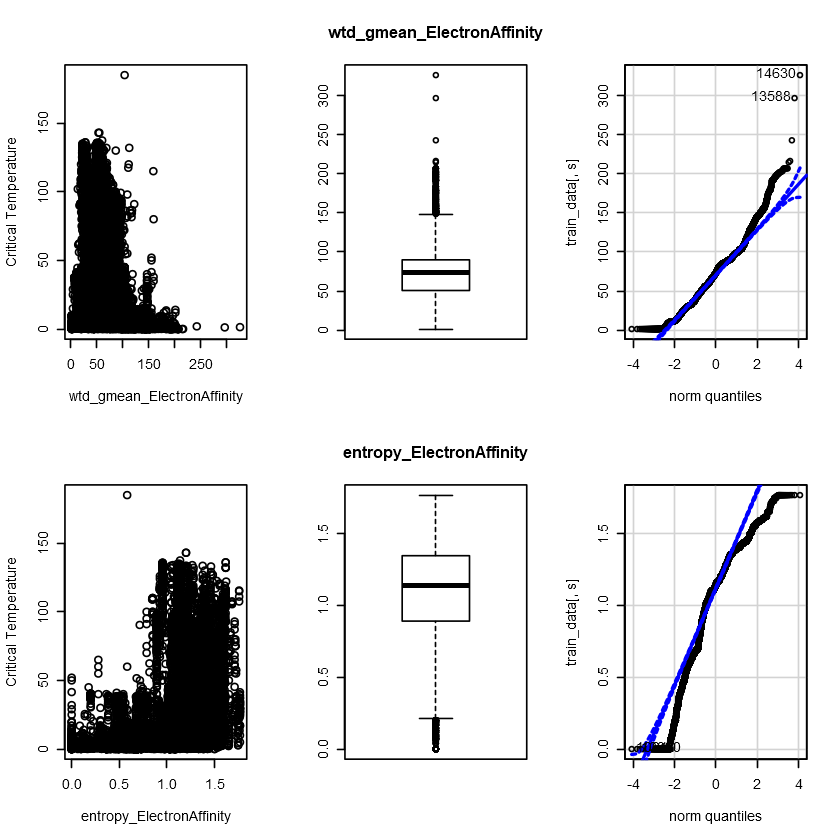

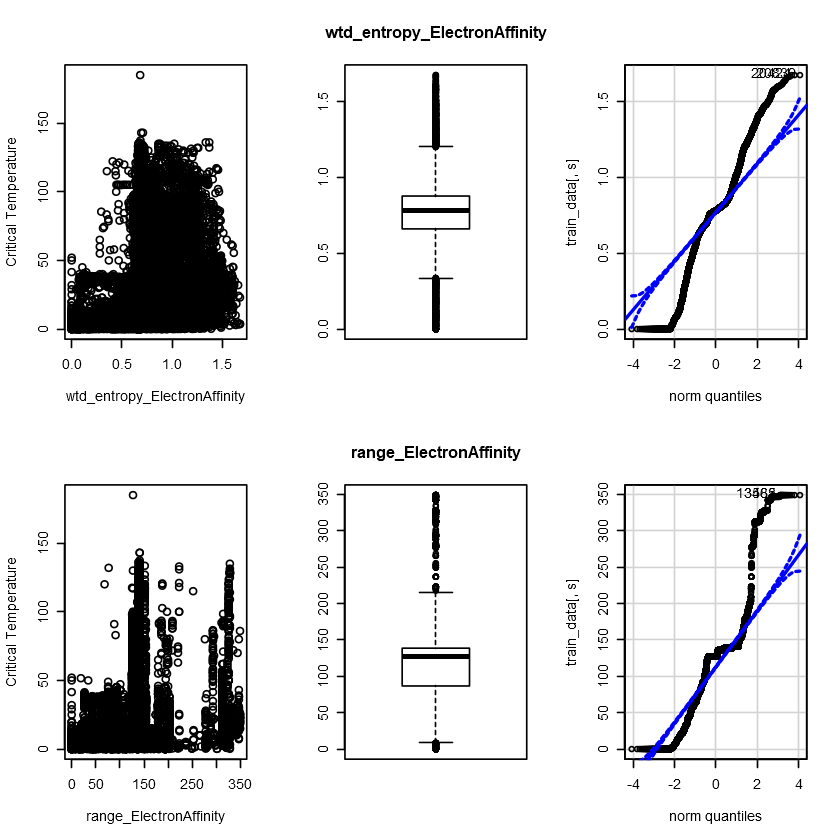

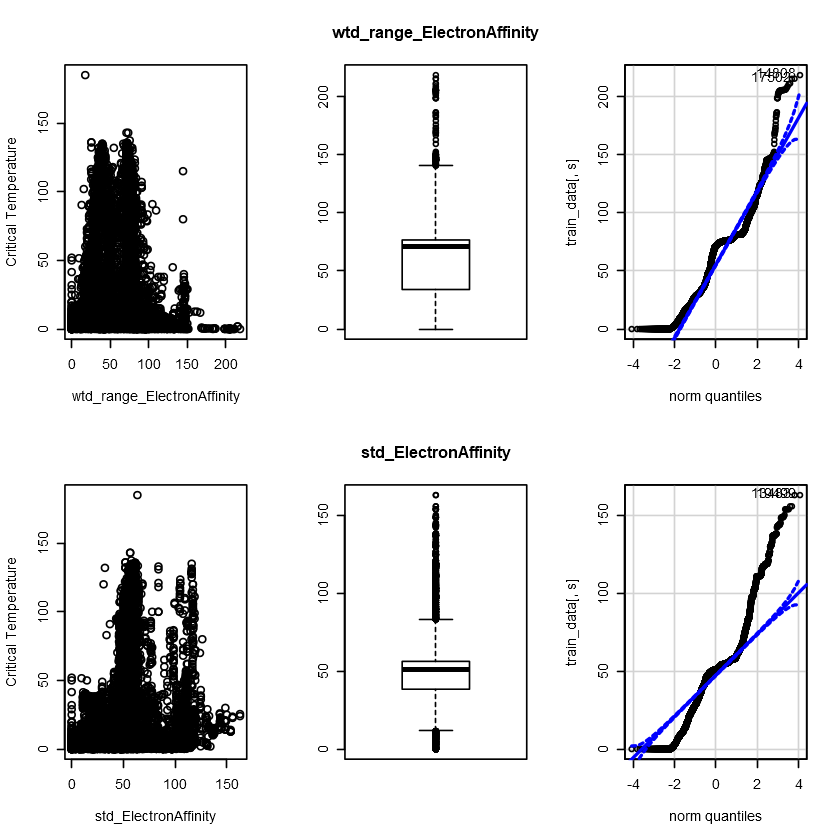

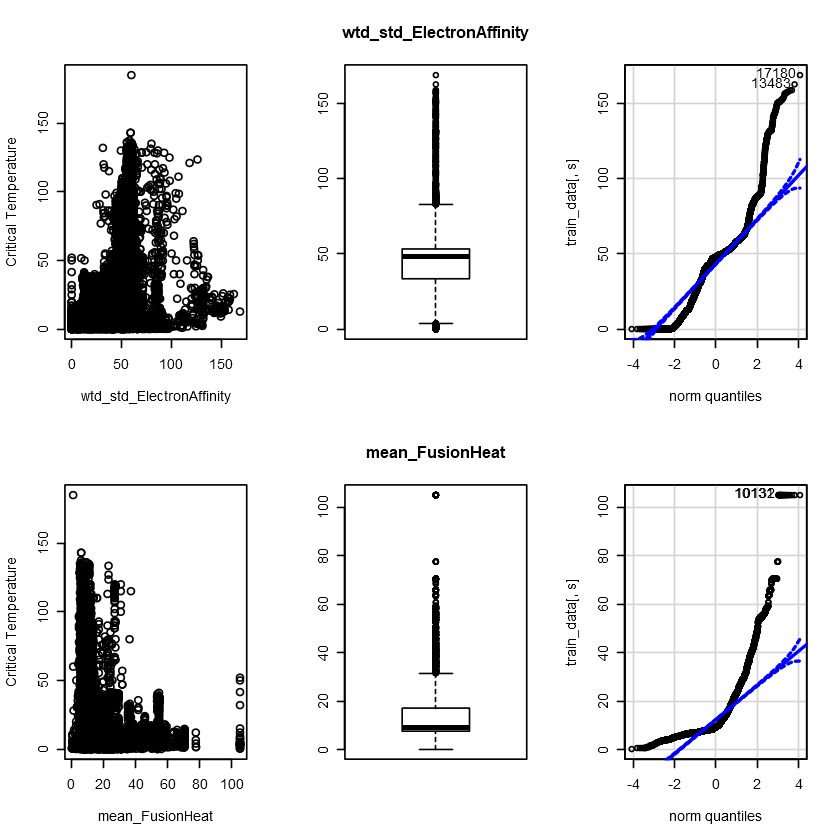

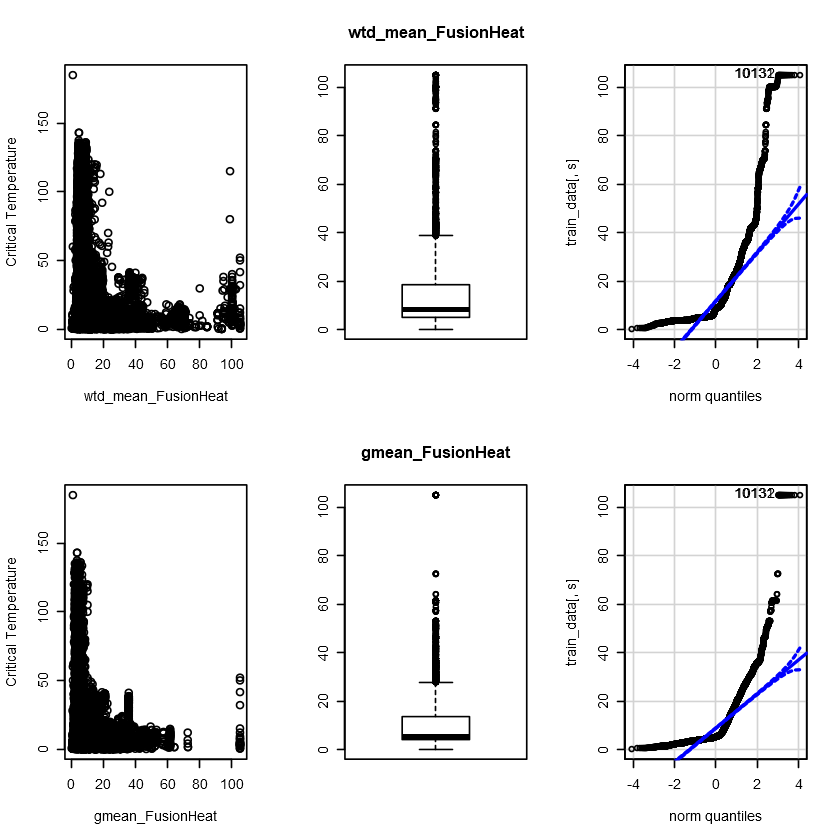

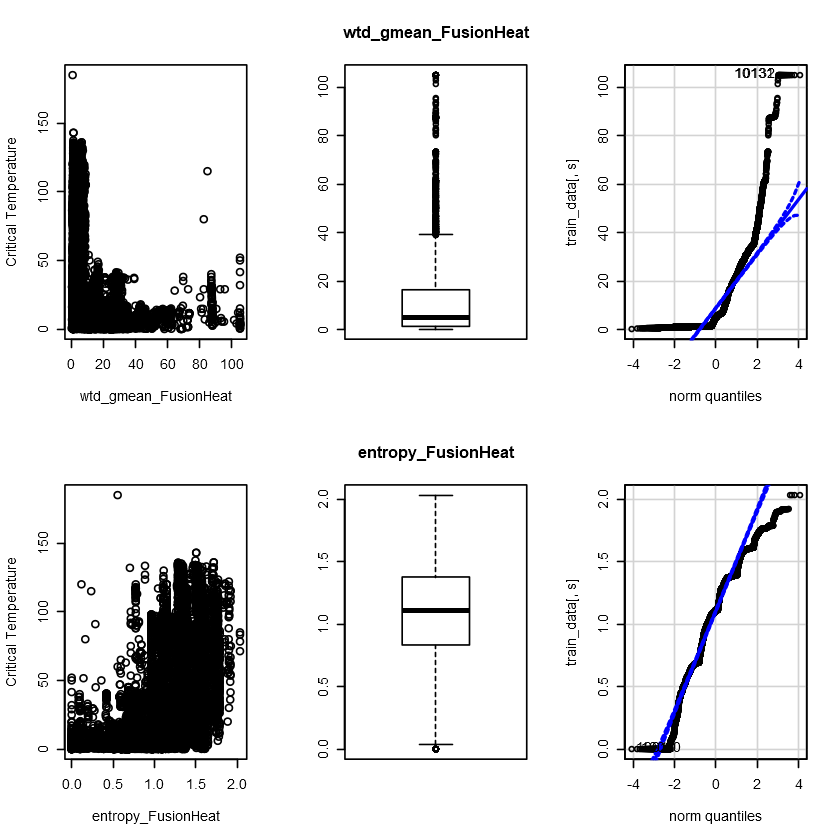

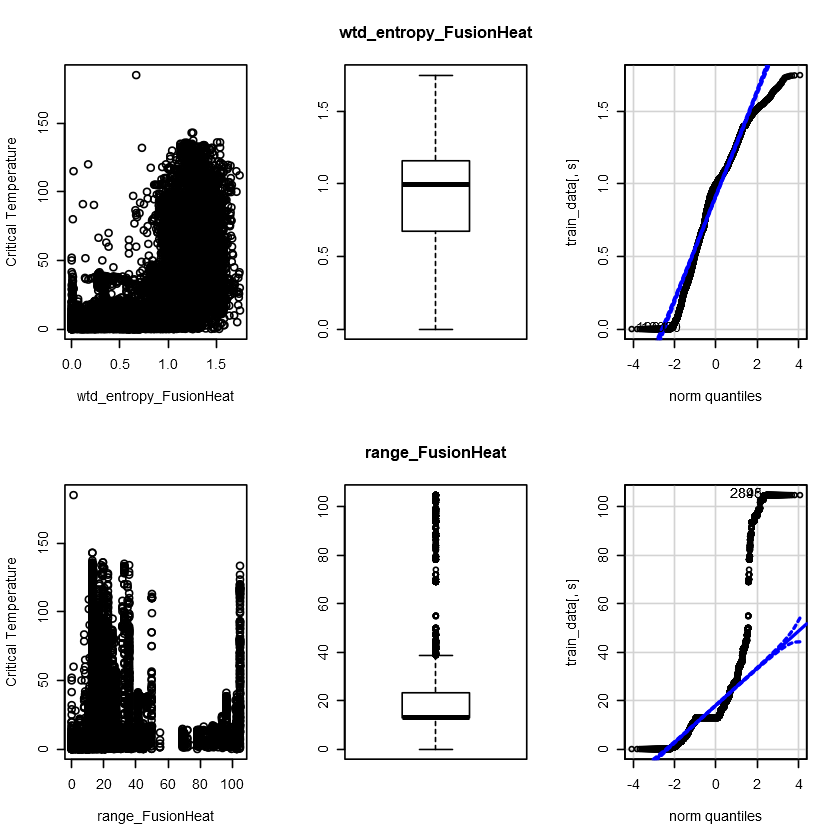

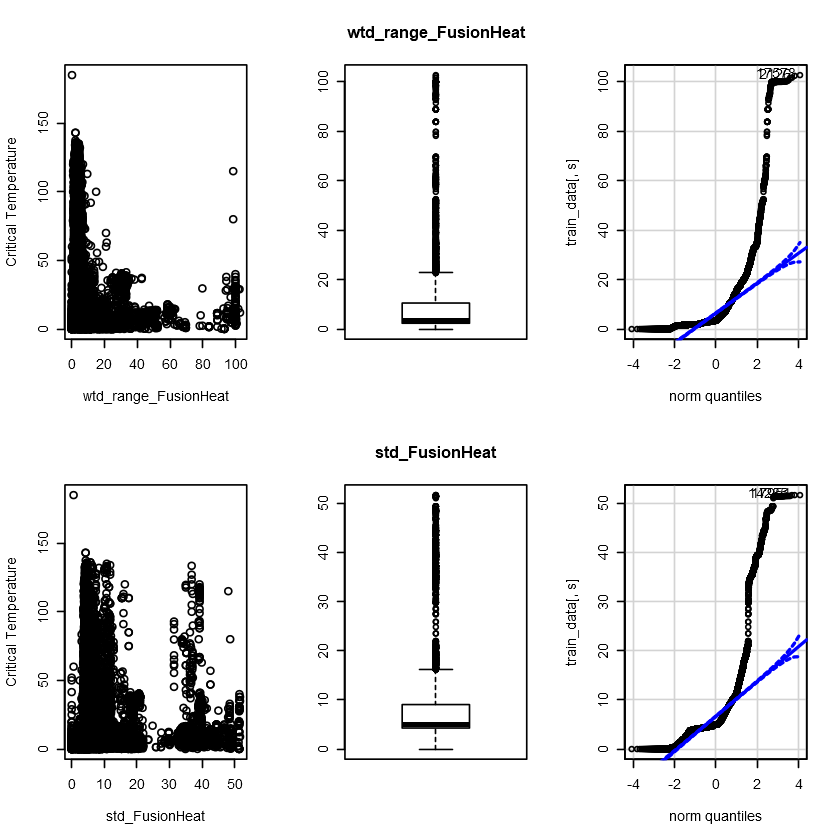

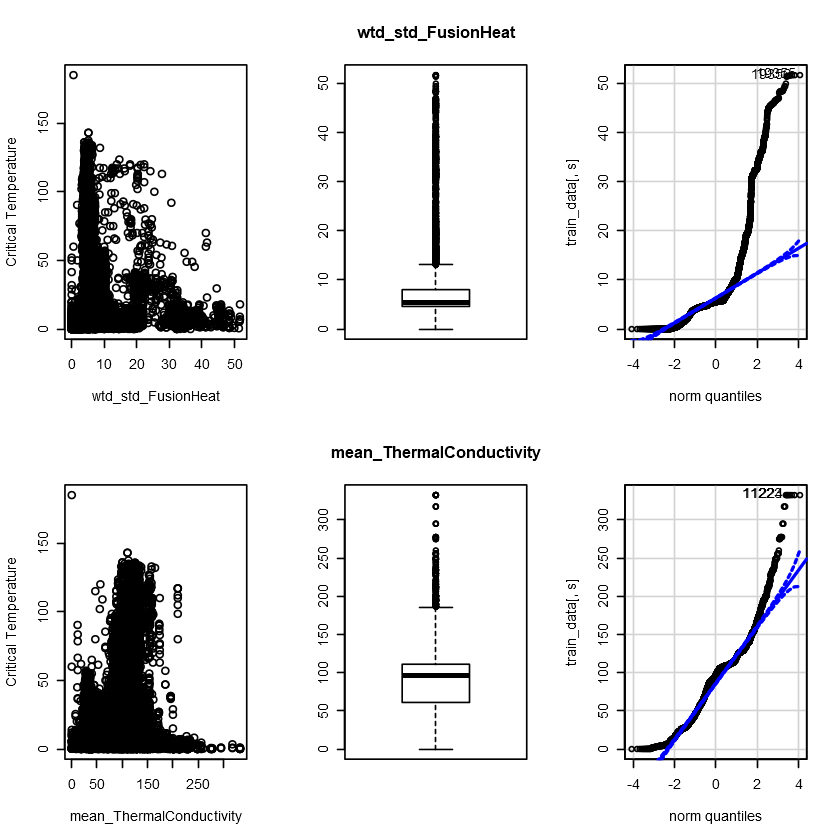

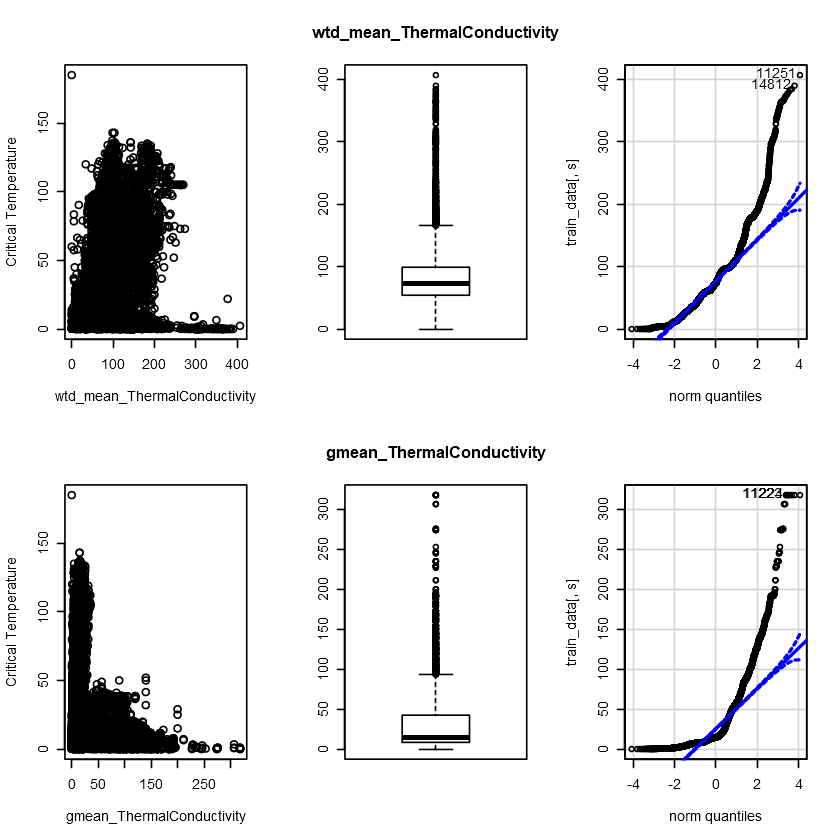

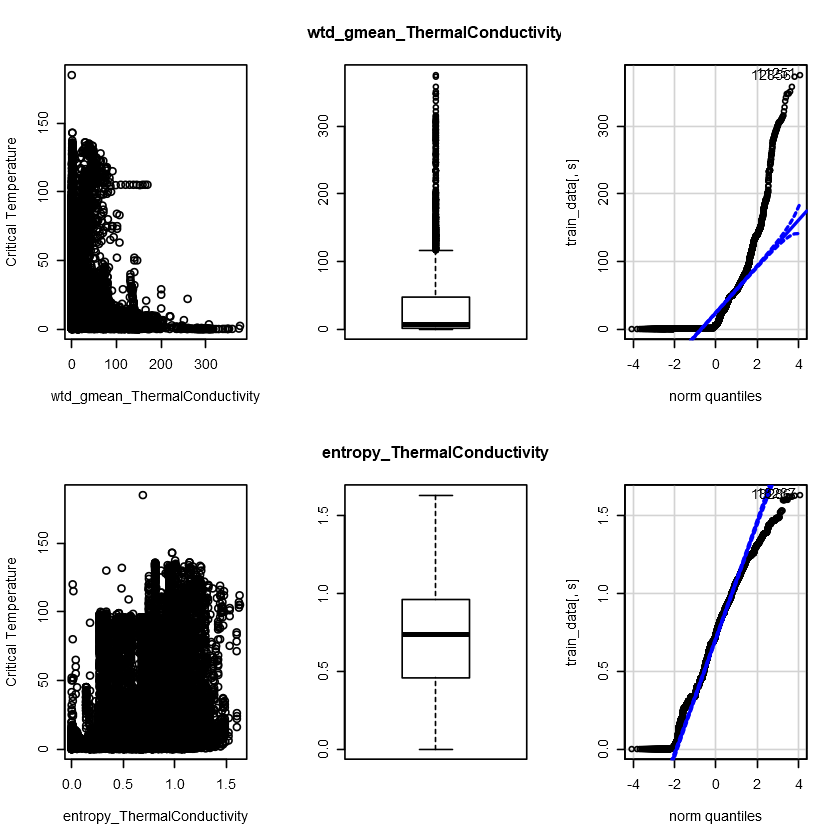

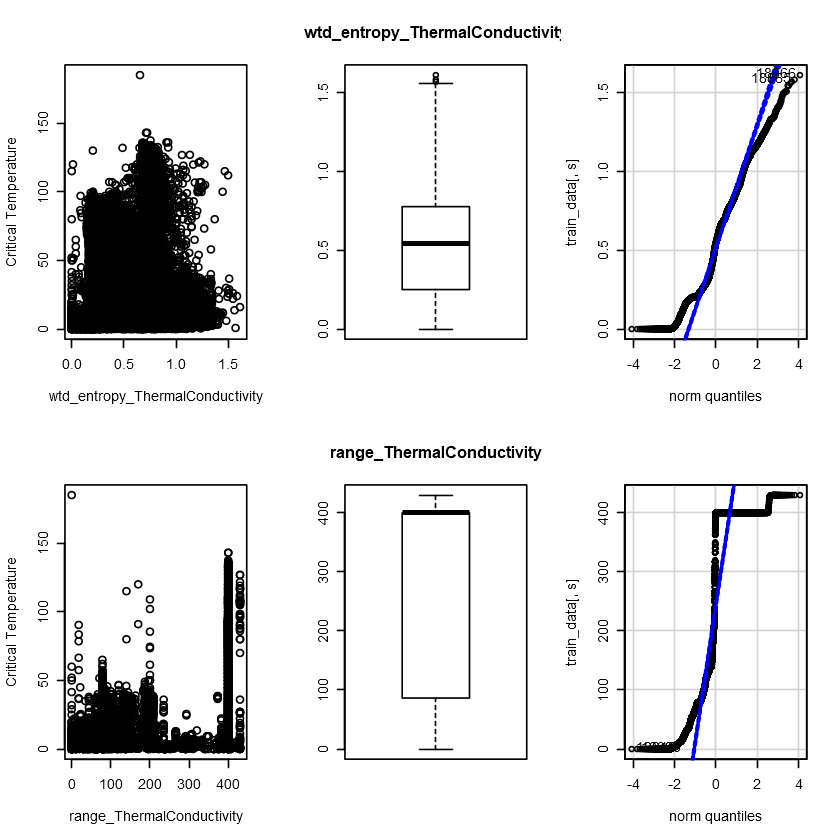

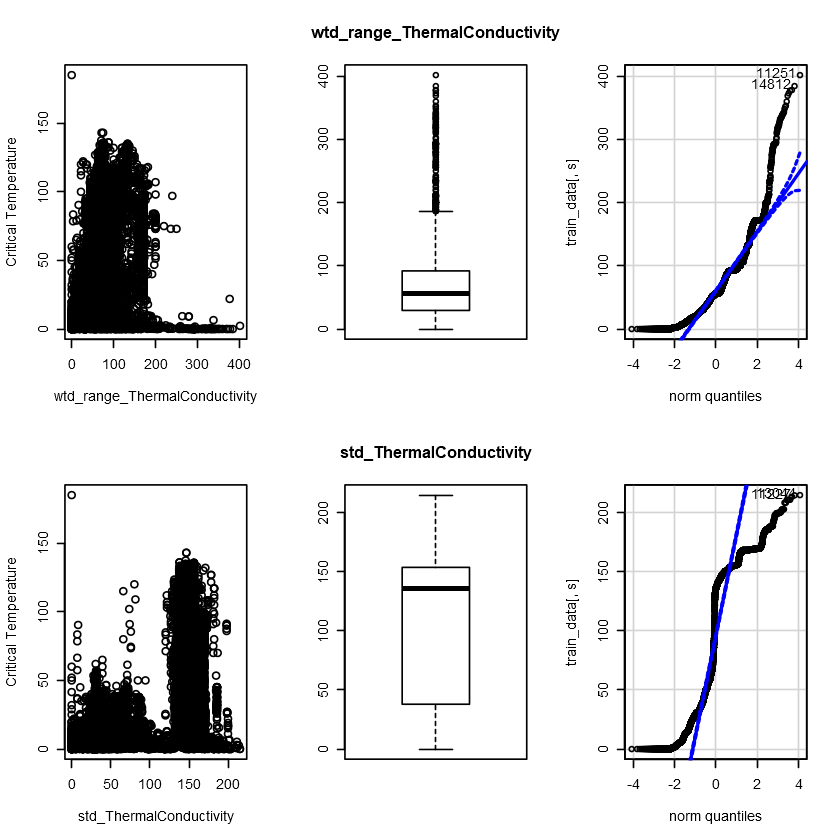

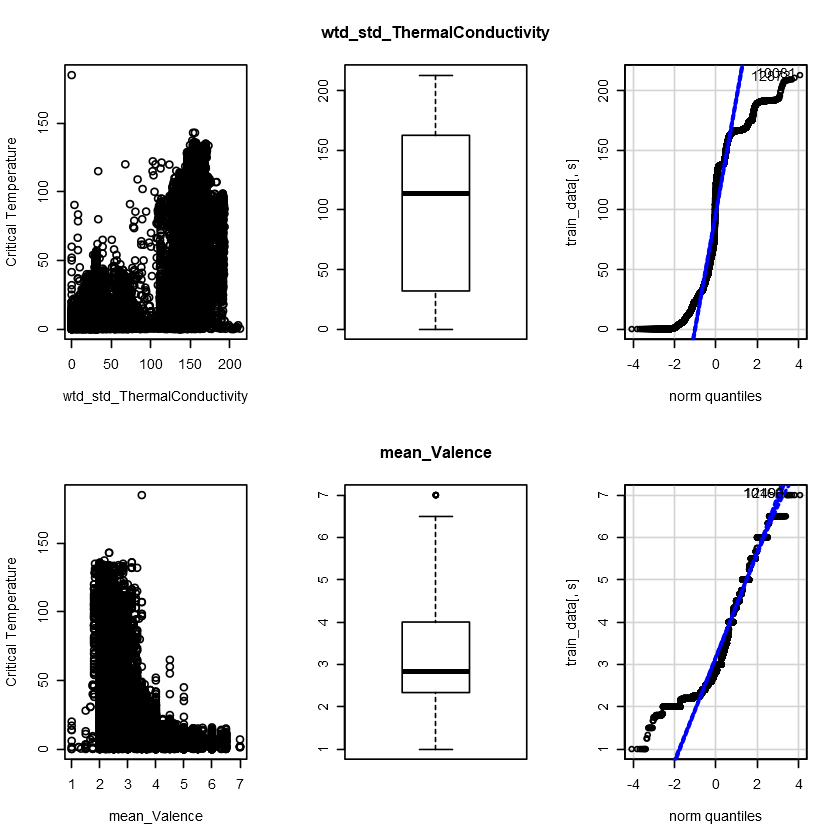

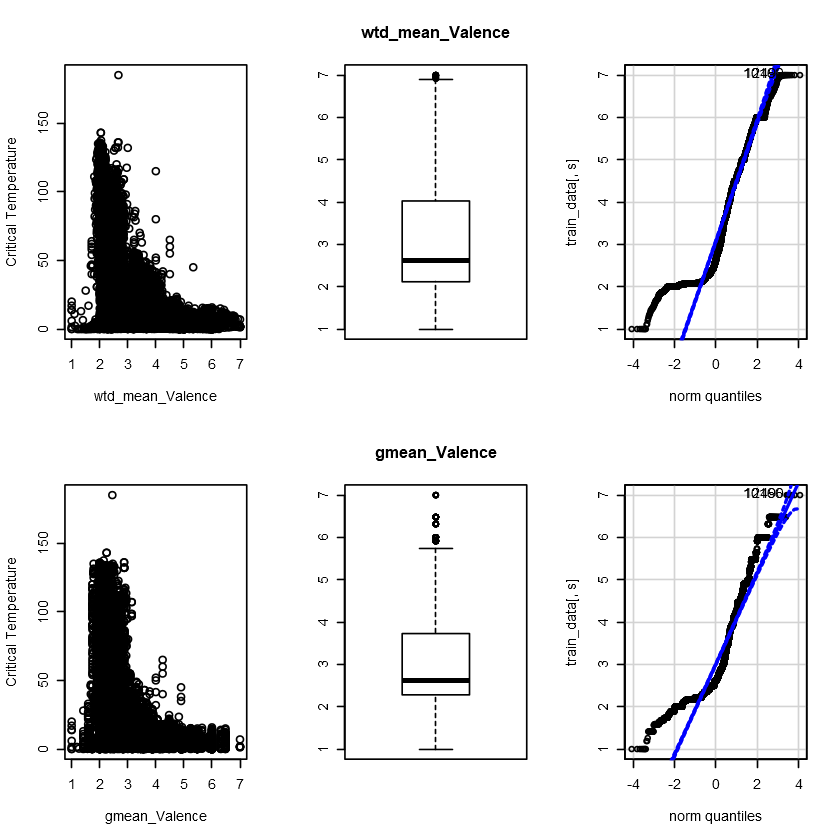

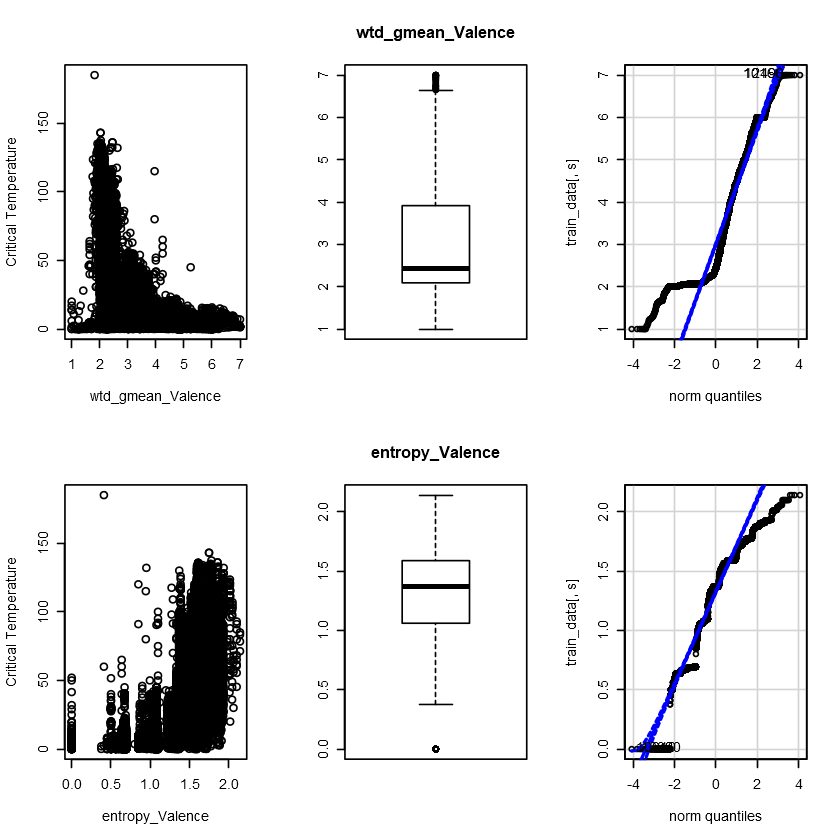

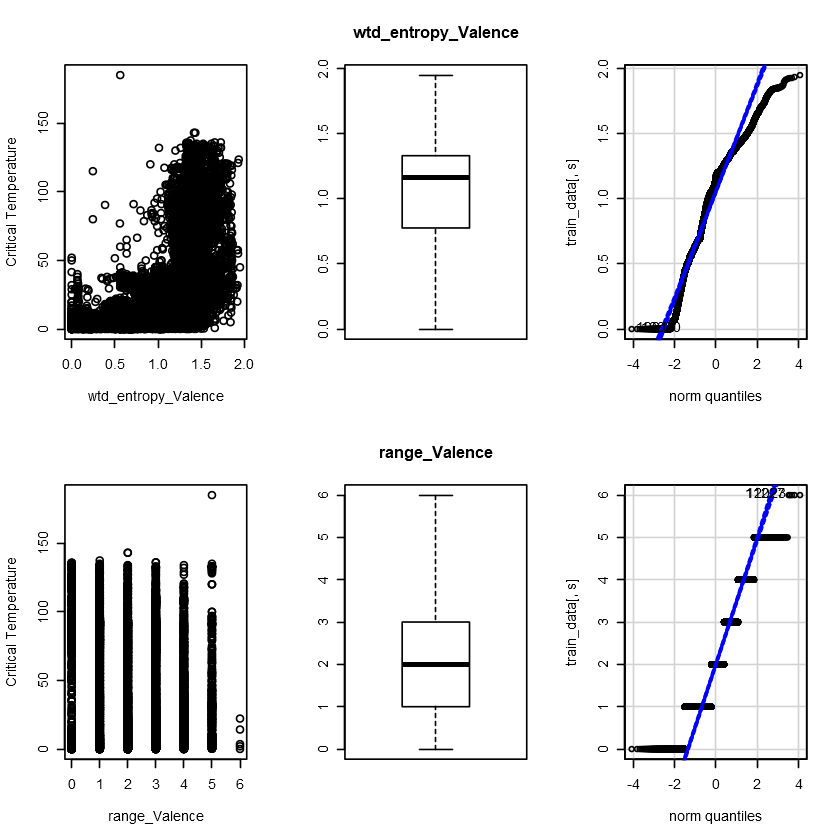

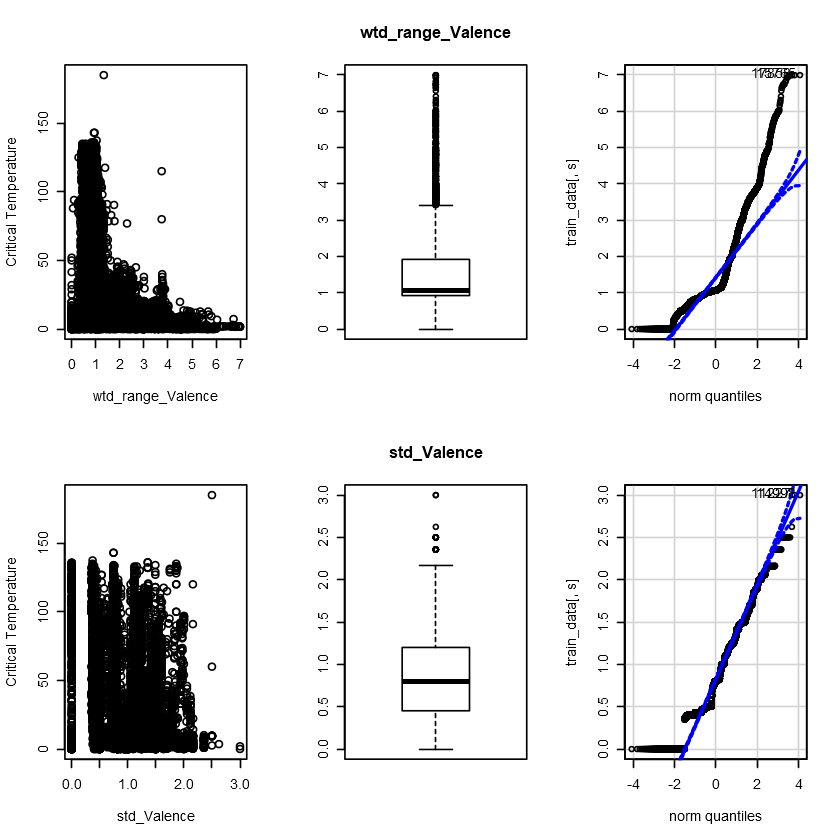

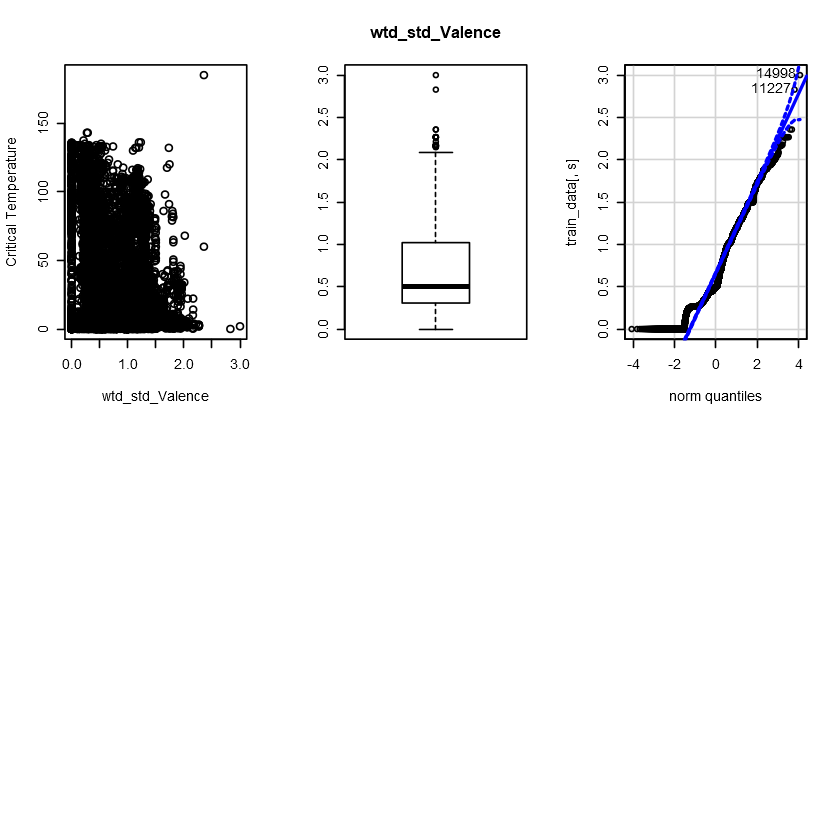

In [ ]:
# Define a two-row by two-column plotting area.
#install.packages("car")
par(mfrow = c(2, 3))
for (s in colnames(train_data[-ncol(train_data)])) {
    #mtext(c("Good", "Bad"), adj = c(0.25, 0.75), col = c("green", "red"))
    #ggplot(train_data, aes(x=train_data[,s], y=train_data[,"critical_temp"]),xlab=s,ylab="Critical_temp") +geom_point()
    plot(x=train_data[ , s], y=train_data[,"critical_temp"], xlab=s, ylab="Critical Temperature")
    boxplot(train_data[ , s], main = paste(s))
    #qqnorm(train_data[ , s])
    qqPlot(train_data[ , s])
    #ggplot(train_data, aes(x=train_data[,s], y=train_data[,"critical_temp"]),xlab=s,ylab=Critical_temp) +geom_point()
    #scatterplot(d[ , x] ~ d$qu, main = paste("Boxplot: ", x, sep = ""))
}

## 2.4) Findings

From the above Exploratory data analysis it could be found that:

1) Range_Valence is a discrete feature in the feature set.

2) There is no strict (linear or non linear) relationship between any one of the features (such as those of Electron Affinity and Valence) and critictal temperatures as evident from the scatter plot. This indicates that we will need a model which incorporates multiple features for linear modelling of this data.

3) Moreover, as evident from box plots and qq plots most features such as those of Thermal Conductivity and Fusion Heat have high skewness and departure from normality which could potentially limit the model's ability to predict accurately.

3) Moreover, distribution of critical temperature is skewed towards lower values. This is reinforced by having outliers at higher temperatures in all scatter plots. This will result in any model we create may  have an inherent bias towards lower temperatures.

4) Moreover from the above correlation analysis, it can be also seen 167/3321 combinations have high correlation (with abs(corr)>=0.8). For example, entropy atomic radius and entropy have a correlation of 1 which would mean only one of the 2 features could exist in a given model. Moreover, this also means that a very small subset of features may be sufficent to explain the temperature.

# 3) Feature Selection

From the above EDA, it can be seen correlation plays an important part between the variables in the data set. As can be seen from the above analysis there is a significant portion on the correlation matrix with green or pink shades signifying high positive or high negative correlation respectively between the variables. 
Moreover, from the above analysis it can be seen that mean absolute correlation between all independent variables is 0.34 (including all zero correlation). The Mean absolute correlation of all independent variables with critical temperature is also 0.38 which suggests that correlation between variables will play an important role in feature selection.
Therefore, correlation based feature selection approach is employed here.

In [ ]:
ind_data=train_data[,2:81]
critical_temp=train_data[,82]

Below is an implementation of Embedded correlation filtering method that picks the variable with highest correlation with the critical temperature and than checks the multi collinearity of the picked variable with already selected variables of interest. For checking multicolinearity, abs(cor)>0.8 is used as suggested in literature.

In [ ]:
features_correlation<-function(train.data,critical_temp){
    cor = cor(train.data, critical_temp)
    #cor_temp <- cor_temp[order(abs(cor_temp), decreasing = TRUE), ]
    cor = cor[order(abs(cor), decreasing = TRUE), ]
    cor = as.data.frame(cor)

    # selecting the feature with highest correlation with critical temperature
    selected = as.data.frame(train.data[,rownames(cor)[1]])

    colnames(selected)[1]<-rownames(cor)[1]
    # iteratively correlation is checked with current selected features with highest correlation with temperature and if there 
    #is not high correlation with other selected features(>0.8 or < -0.8) than the feature is added to the the selection
    #print(selected)
    for (i in 2:nrow(cor)) {
      cor_att = cor(train.data[,colnames(selected)],train.data[,rownames(cor)[i]])
      if (sum(cor_att>0.8 |cor_att< (-0.8) )==0){
       #if (sum(cor_att>0.8)==0){ 
        selected = cbind(selected,train.data[rownames(cor)[i]])
        colnames(selected)[ncol(selected)]<- rownames(cor)[i]
      }
    }
    return (selected)
}

In [ ]:
selected_features=features_correlation(ind_data,critical_temp)

colnames(selected_features)

[1] "wtd_std_ThermalConductivity"     "range_atomic_radius"            
 [3] "wtd_mean_Valence"                "wtd_entropy_atomic_mass"        
 [5] "range_atomic_mass"               "wtd_range_ThermalConductivity"  
 [7] "wtd_range_Valence"               "entropy_ElectronAffinity"       
 [9] "wtd_mean_Density"                "wtd_gmean_FusionHeat"           
[11] "wtd_gmean_atomic_radius"         "wtd_entropy_fie"                
[13] "gmean_ThermalConductivity"       "gmean_ElectronAffinity"         
[15] "mean_ThermalConductivity"        "wtd_range_atomic_radius"        
[17] "wtd_range_atomic_mass"           "wtd_std_ElectronAffinity"       
[19] "wtd_range_fie"                   "wtd_std_Valence"                
[21] "range_Density"                   "gmean_atomic_mass"              
[23] "std_FusionHeat"                  "wtd_range_ElectronAffinity"     
[25] "gmean_atomic_radius"             "wtd_entropy_ThermalConductivity"
[27] "wtd_mean_ElectronAffinity"       "mean_fie"                       
[29] "entropy_ThermalConductivity"

Furthermore, as can be seen that just by using correlation analysis (colliniarity>0.8 or <-0.8) 51/80 features have been removed.

In [ ]:
new_data=cbind(selected_features,critical_temp)

head(new_data)

wtd_std_ThermalConductivity range_atomic_radius wtd_mean_Valence
1 138.5172                    205                 2.257143        
2 139.6309                    205                 2.257143        
3 138.5406                    205                 2.271429        
4 138.5289                    205                 2.264286        
5 138.4937                    205                 2.242857        
6 138.4466                    205                 2.214286        
  wtd_entropy_atomic_mass range_atomic_mass wtd_range_ThermalConductivity
1 1.0623955               122.9061          57.12767                     
2 1.0577551               122.9061          51.41338                     
3 0.9759805               122.9061          57.12767                     
4 1.0222909               122.9061          57.12767                     
5 1.1292237               122.9061          57.12767                     
6 1.2252028               122.9061          57.12767                     
  wtd_range_Valence entropy_ElectronAffinity wtd_mean_Density
1 1.085714          1.159687                 2961.502        
2 1.128571          1.427997                 3021.017        
3 1.114286          1.159687                 2999.159        
4 1.100000          1.159687                 2980.331        
5 1.057143          1.159687                 2923.845        
6 1.000000          1.159687                 2848.531        
  wtd_gmean_FusionHeat ... range_Density gmean_atomic_mass std_FusionHeat
1 1.040986             ...  8958.571     66.36159          4.599064      
2 1.035251             ... 10488.571     73.13279          4.473363      
3 1.037439             ...  8958.571     66.36159          4.599064      
4 1.039211             ...  8958.571     66.36159          4.599064      
5 1.044545             ...  8958.571     66.36159          4.599064      
6 1.051699             ...  8958.571     66.36159          4.599064      
  wtd_range_ElectronAffinity gmean_atomic_radius
1 80.98714                   136.1260           
2 81.20786                   141.4652           
3 81.20786                   136.1260           
4 81.09750                   136.1260           
5 80.76643                   136.1260           
6 80.32500                   136.1260           
  wtd_entropy_ThermalConductivity wtd_mean_ElectronAffinity mean_fie
1 0.2628483                       111.7271                  775.425 
2 0.5677061                       112.3164                  766.440 
3 0.2504774                       112.2136                  775.425 
4 0.2570451                       111.9704                  775.425 
5 0.2728199                       111.2407                  775.425 
6 0.2882356                       110.2679                  775.425 
  entropy_ThermalConductivity critical_temp
1 0.3081480                   29           
2 0.8474042                   26           
3 0.3081480                   19           
4 0.3081480                   22           
5 0.3081480                   23           
6 0.3081480                   23

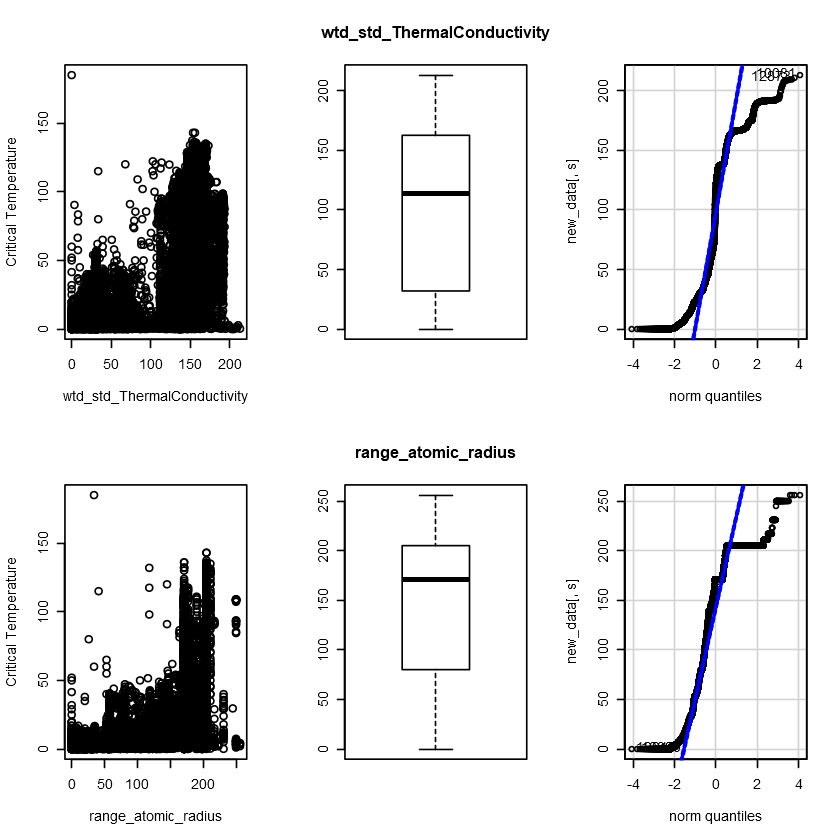

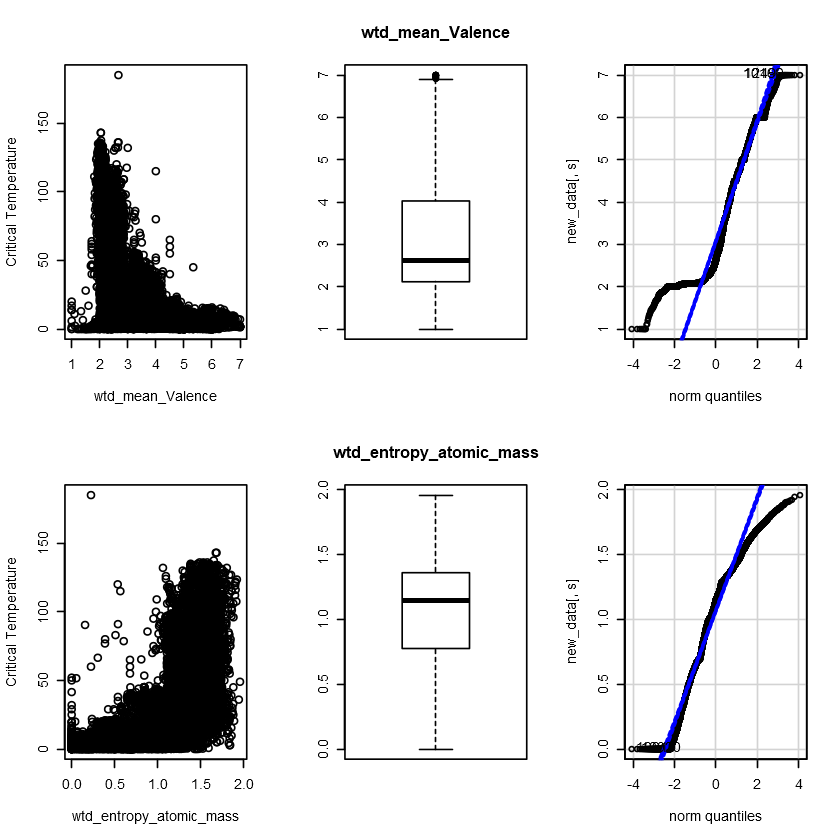

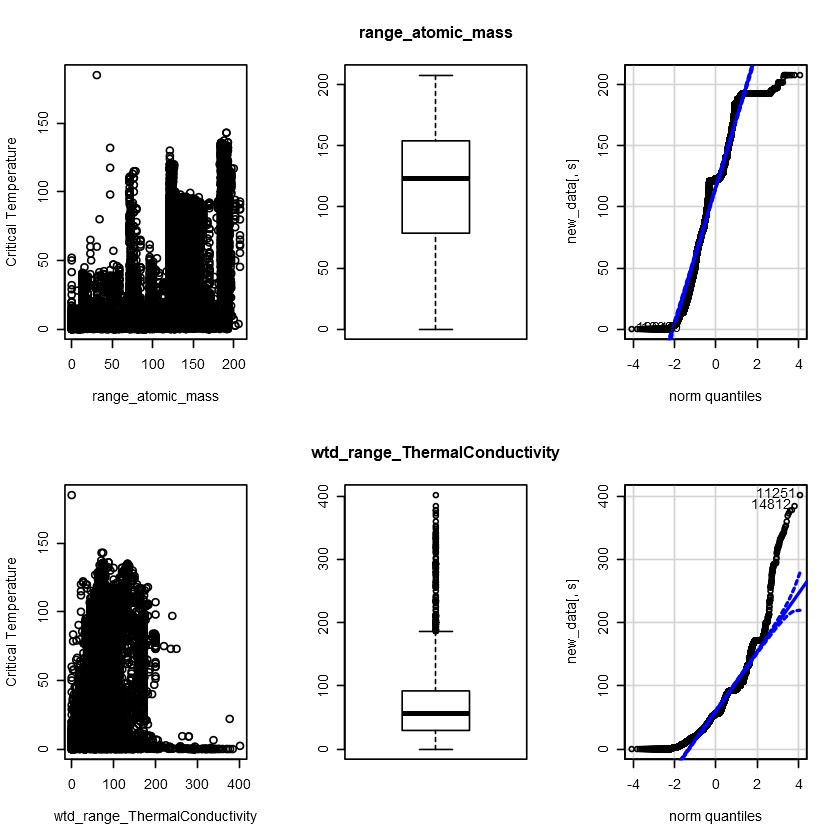

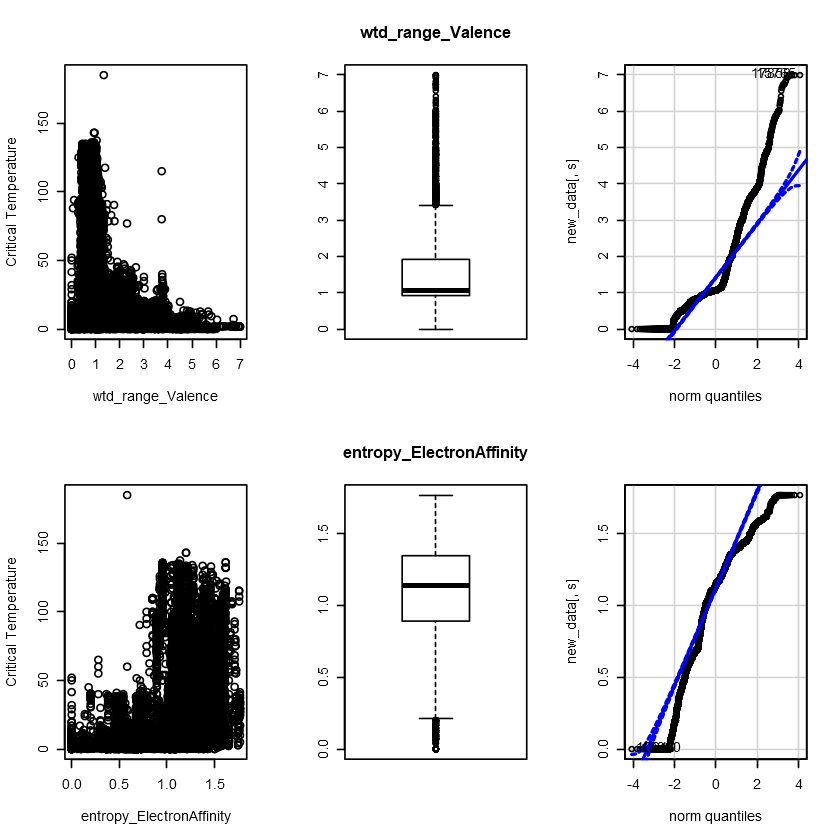

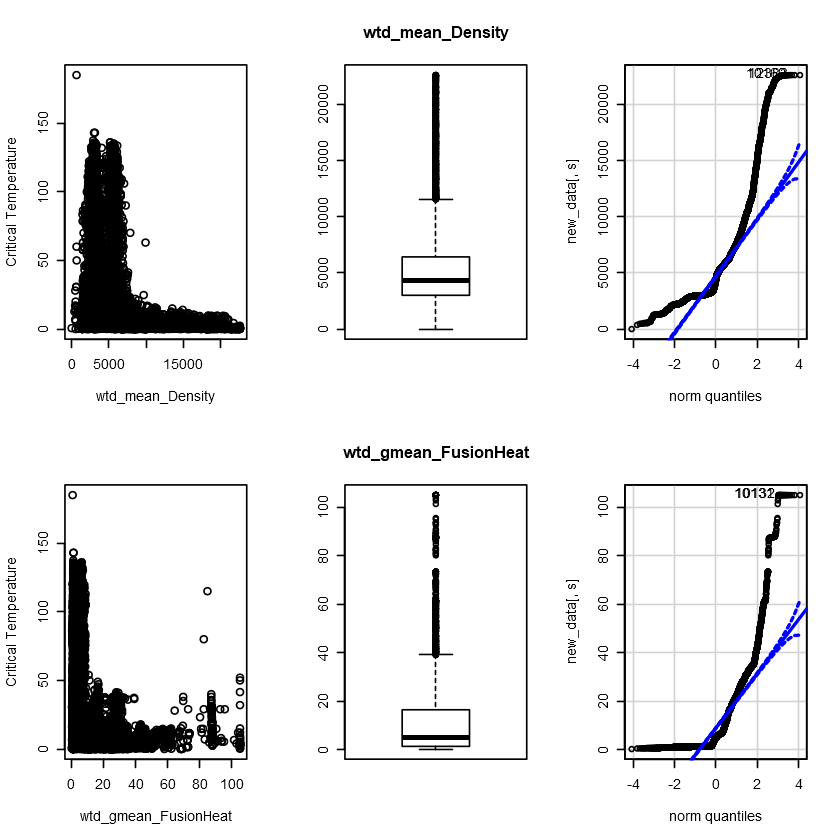

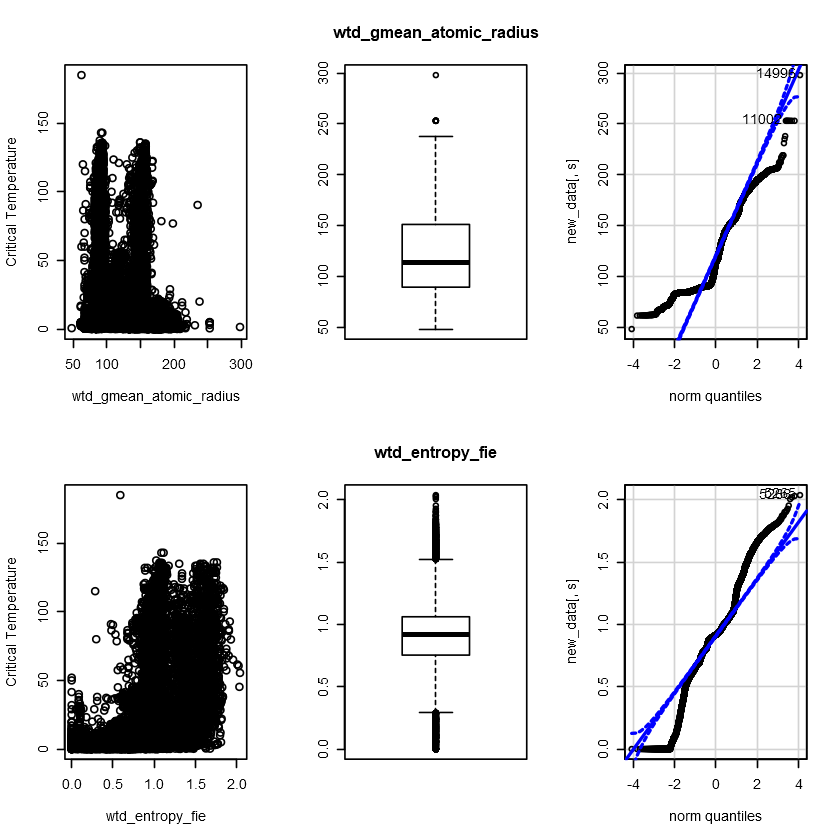

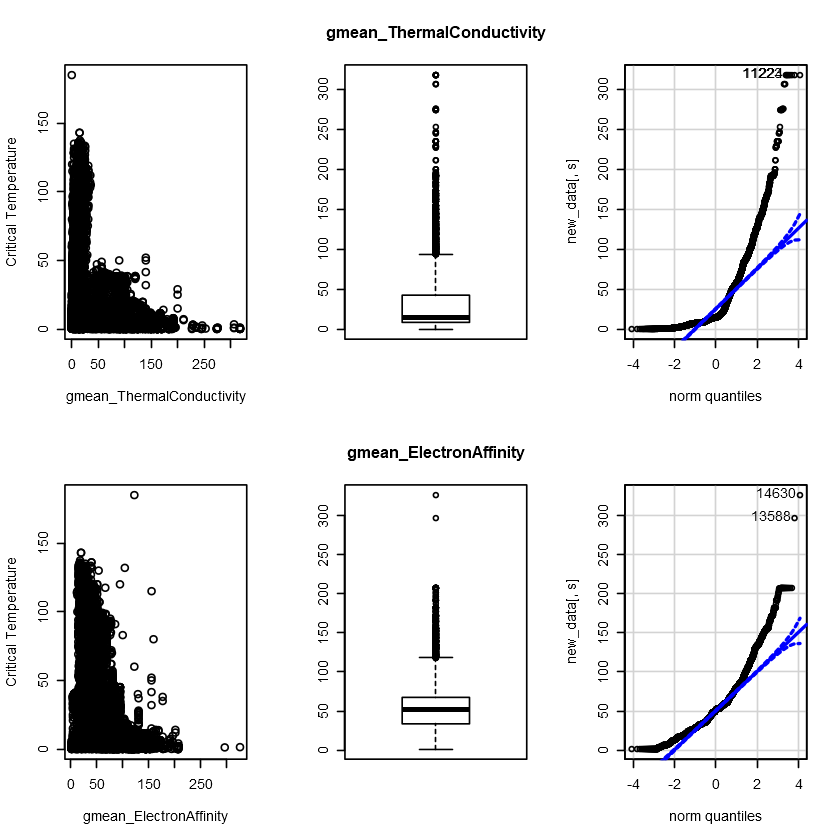

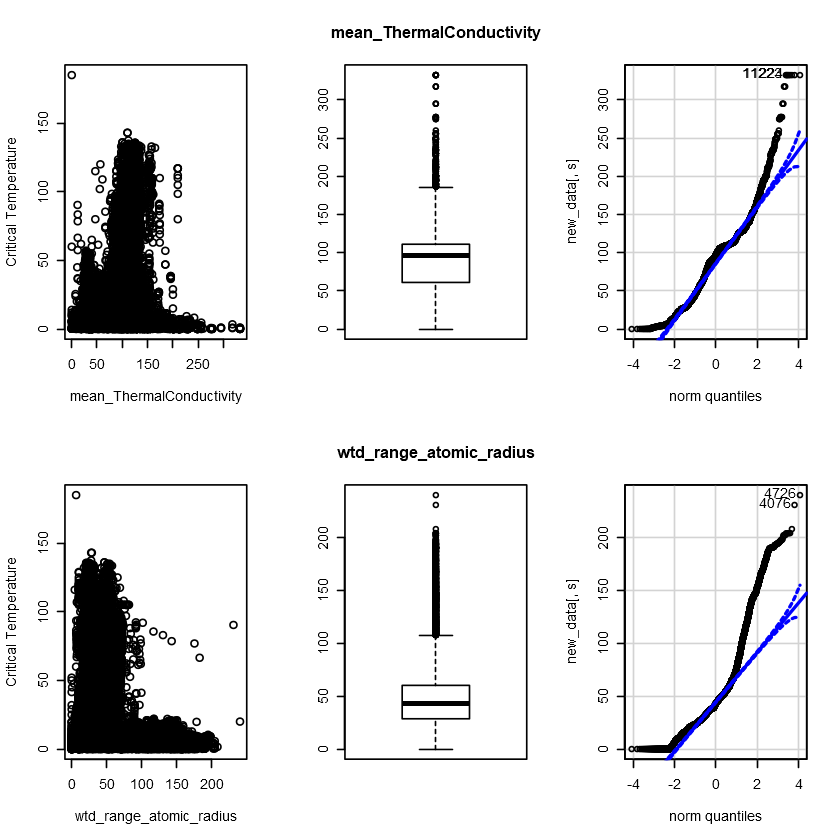

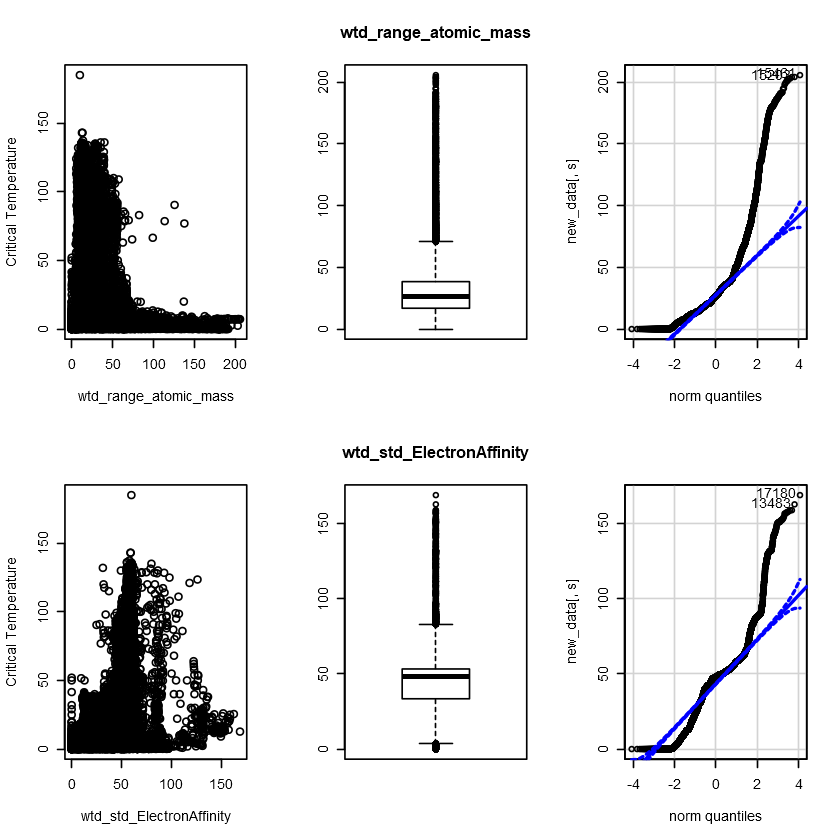

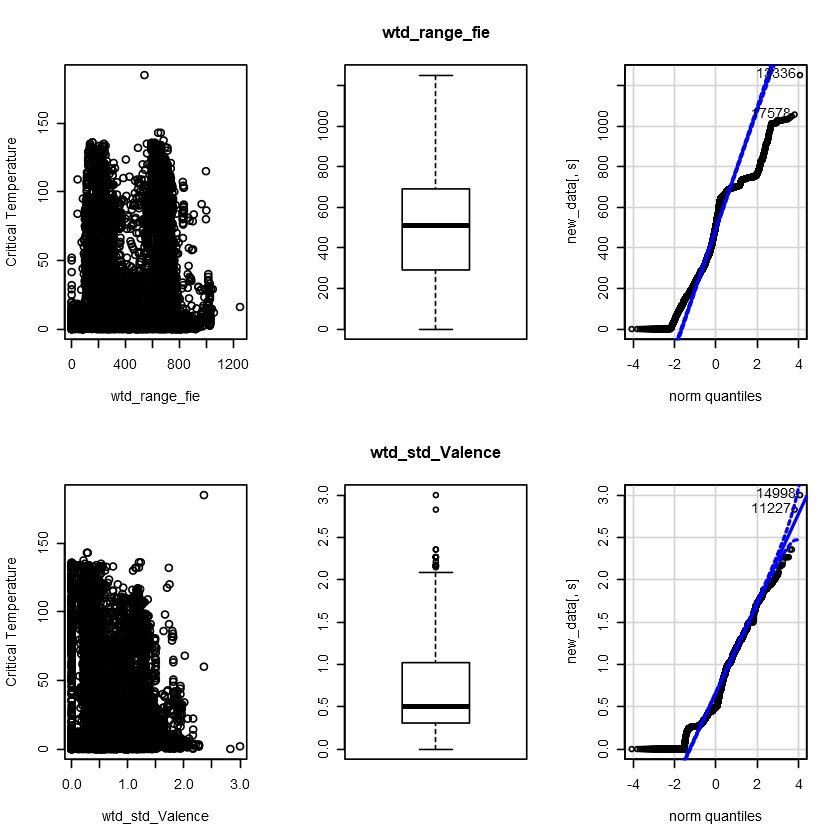

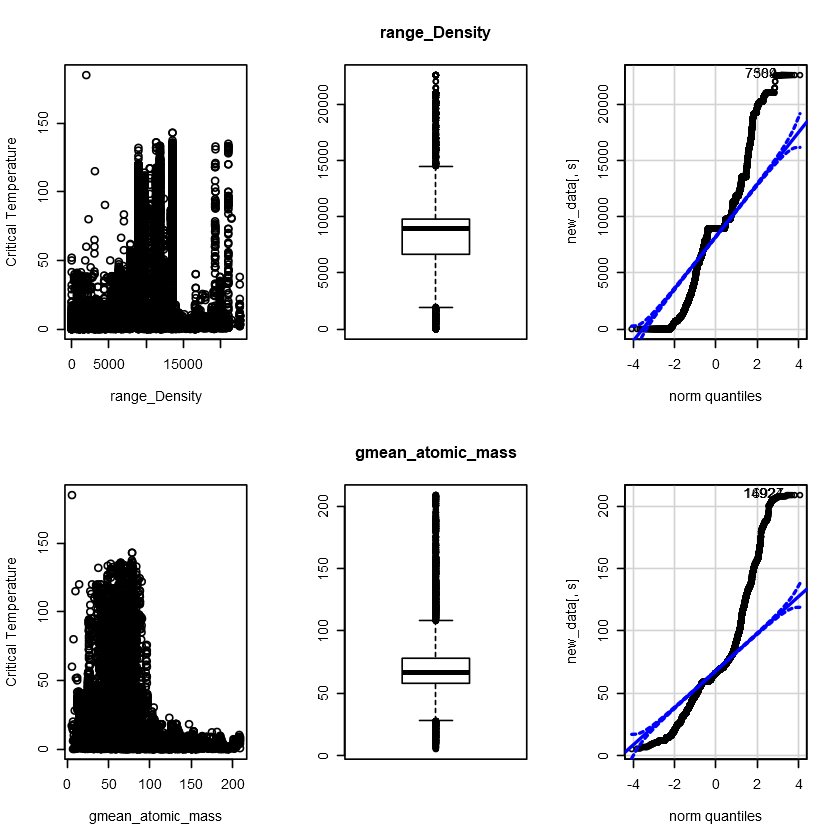

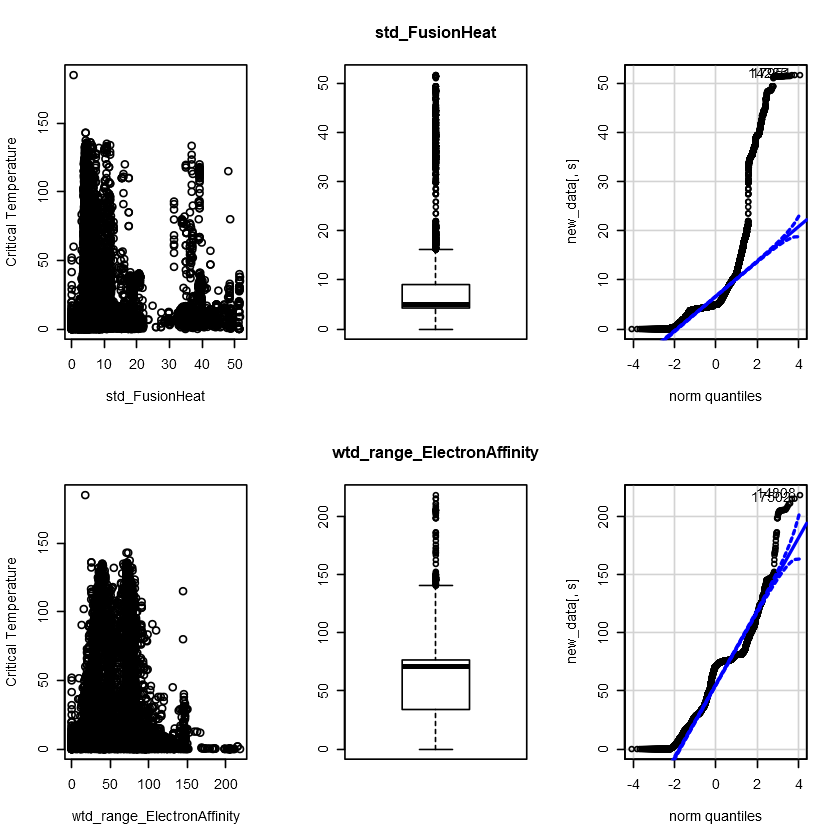

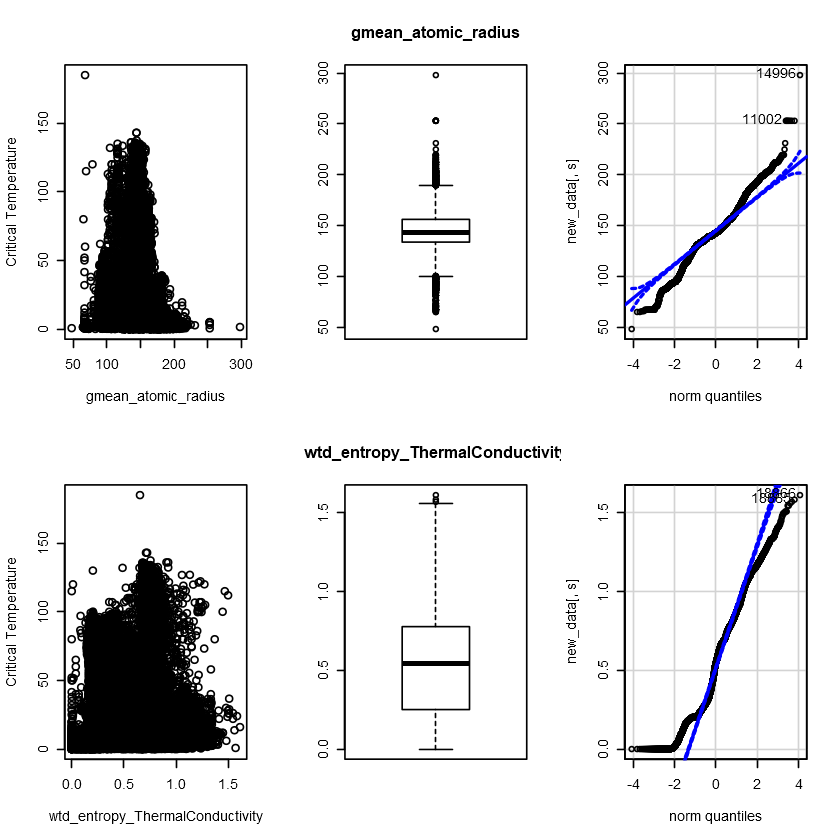

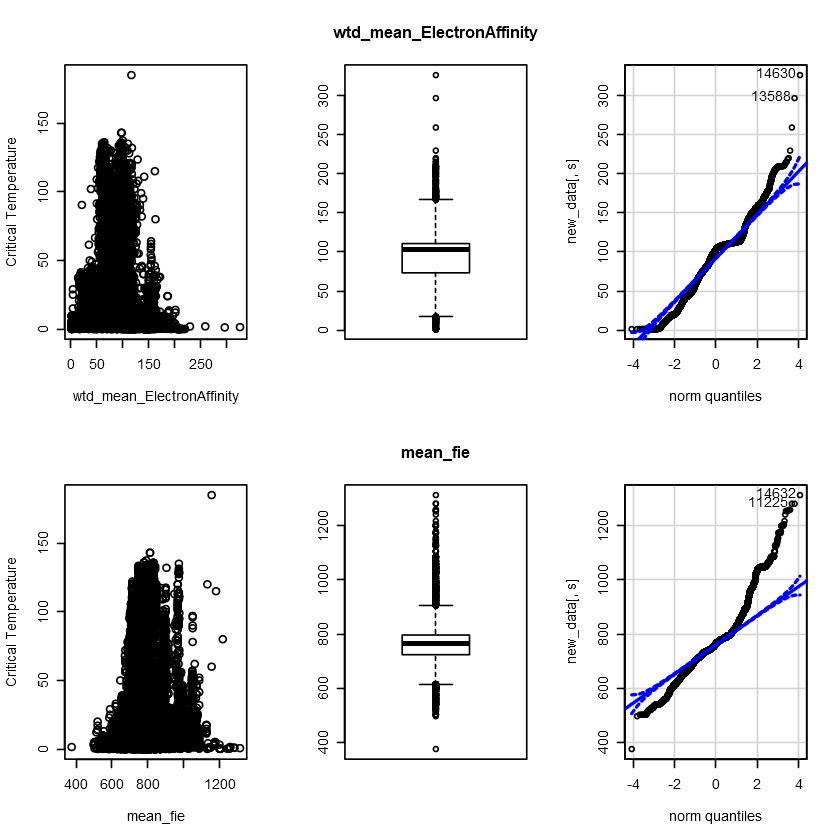

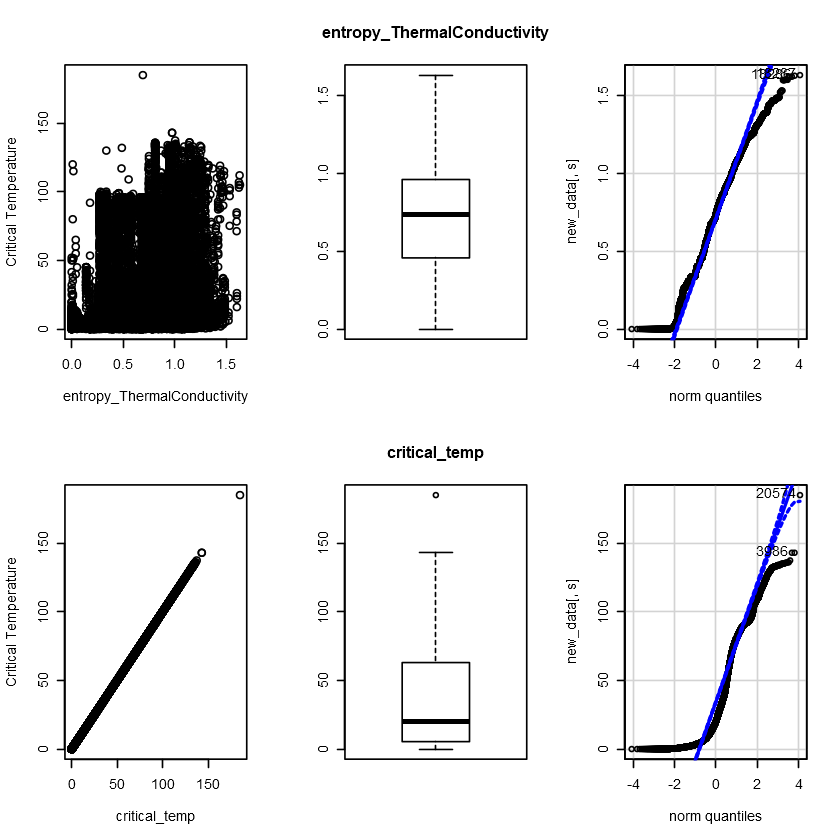

In [ ]:
# Define a two-row by two-column plotting area.
#install.packages("car")
par(mfrow = c(2, 3))
for (s in colnames(new_data)) {
    plot(x=new_data[ ,s], y=new_data[,"critical_temp"], xlab=s, ylab="Critical Temperature")
    boxplot(new_data[ ,s], main = paste(s))
    qqPlot(new_data[ , s])
}

In [ ]:
attr_importance=as.data.frame(information.gain(critical_temp~., new_data))
attr_importance<- cbind(features = rownames(attr_importance), attr_importance)
rownames(attr_importance) <- 1:nrow(attr_importance)
attr_importance <- attr_importance[order(attr_importance$attr_importance, decreasing = TRUE), ]
attr_importance

features                        attr_importance
8  entropy_ElectronAffinity        0.7109685      
14 gmean_ElectronAffinity          0.6849667      
13 gmean_ThermalConductivity       0.6349953      
22 gmean_atomic_mass               0.6297992      
15 mean_ThermalConductivity        0.6224257      
29 entropy_ThermalConductivity     0.6209604      
21 range_Density                   0.6008722      
28 mean_fie                        0.5991035      
5  range_atomic_mass               0.5835704      
23 std_FusionHeat                  0.5740325      
25 gmean_atomic_radius             0.5665772      
3  wtd_mean_Valence                0.5618526      
2  range_atomic_radius             0.5433334      
1  wtd_std_ThermalConductivity     0.5349101      
10 wtd_gmean_FusionHeat            0.4997637      
6  wtd_range_ThermalConductivity   0.4502794      
11 wtd_gmean_atomic_radius         0.4496091      
4  wtd_entropy_atomic_mass         0.4180403      
24 wtd_range_ElectronAffinity      0.4086556      
7  wtd_range_Valence               0.4076735      
18 wtd_std_ElectronAffinity        0.4004220      
9  wtd_mean_Density                0.3879672      
20 wtd_std_Valence                 0.3750408      
19 wtd_range_fie                   0.3237786      
27 wtd_mean_ElectronAffinity       0.3191924      
12 wtd_entropy_fie                 0.3046703      
17 wtd_range_atomic_mass           0.2984154      
16 wtd_range_atomic_radius         0.2671715      
26 wtd_entropy_ThermalConductivity 0.2217587

Correlation was used as a ranking measure because it inherently caters to continuos dependent variables compared to other ranking measures such as information criteria, mutual information, entropy which discretize the dependent variable making it more suitable for classification problems.

Moreover, the information gain criteria also shows the importance of each of the selected features with minimum gain of 22.17% for wtd_entropy_ThermalConductivity, which shows that also features selected are of high relevance with respect to critical temperature.
Moreover, most of the selected features also have good distribution including minimal outliers and minimal deviations (from normality) compared to the features which are not selected, which could also help in reducing the errors of predictions.

This approach to feature selection (using correlation ranking) may not adequately capture non linear relations with the dependent variable (critical temperature). However, our EDA did not suggested any explicit non linear relation between the variables. Moreover, a better solution to this problem can also be obtained by model based feature selection which can than potentially induce bias in our model development (depending upon the feature selection model selected). Therefore, embedded correlation analysis was deemed as the best approach for this data set. 
Moreover other measures such as VIF could also be used with a backward elimination or piece wise forward selection for the feature extraction process that goes well with correlation.

# 4) Model Development

To keep the results consistent with the paper "A Data-Driven Statistical Model for Predicting the Critical
Temperature of a Superconductor" (Hamidieh 2018) the train and test data are broken in 2/3 and 1/3 respectively of the total set.
This will result in a total of 14175 randomly assigned data points for the training data other 7088 to the test data.

In [ ]:
train.index <- sample(1:nrow(train_data),size=14175,replace = FALSE)
#print(train.index)
train.data=train_data[train.index,]
test.data=train_data[-train.index,]

In [ ]:
train.data=train.data[,2:82]
test.data=test.data[,2:82]
dim(train.data)

[1] 14175    81

In [ ]:
train.data_sel=new_data[train.index,]
test.data_sel=new_data[-train.index,]
dim(train.data_sel)

[1] 14175    30

## 3.1) Multiple Linear Regression

To start I started my model development with all features included to multiple linear regression model as a base case.

### 3.1.1) Multiple regression with ALL features

In [ ]:
fit_full_reg=lm(critical_temp~.,data=train.data)
summary(fit_full_reg)


Call:
lm(formula = critical_temp ~ ., data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.601  -9.343   0.571  10.969 166.566 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.168e+01  6.112e+00  -3.547 0.000391 ***
mean_atomic_mass                 7.531e-01  9.840e-02   7.654 2.08e-14 ***
wtd_mean_atomic_mass            -7.555e-01  1.242e-01  -6.085 1.20e-09 ***
gmean_atomic_mass               -4.476e-01  9.796e-02  -4.569 4.93e-06 ***
wtd_gmean_atomic_mass            5.307e-01  1.177e-01   4.509 6.58e-06 ***
entropy_atomic_mass             -3.997e+01  5.605e+00  -7.131 1.04e-12 ***
wtd_entropy_atomic_mass          9.192e+00  4.480e+00   2.052 0.040204 *  
range_atomic_mass                2.185e-01  2.036e-02  10.728  < 2e-16 ***
wtd_range_atomic_mass            2.338e-02  2.746e-02   0.851 0.394591    
std_atomic_mass                 -5.597e-01  7.598e-02  -7.366 1.86e-13 ***
wtd_std_

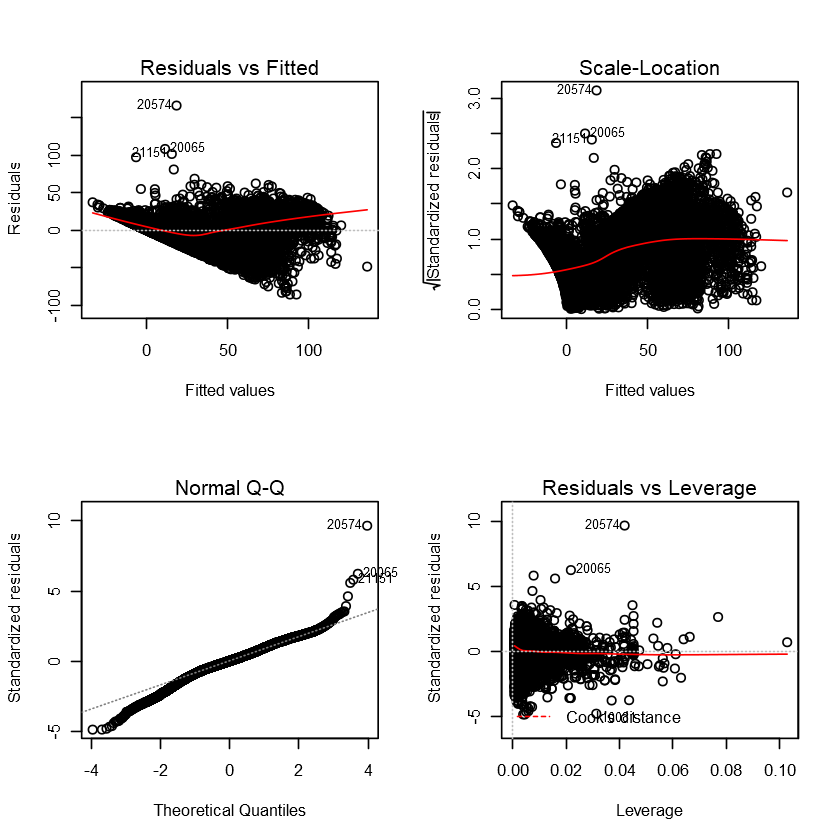

In [ ]:
par(mfcol=c(2,2))
plot(fit_full_reg)


	Breusch-Godfrey test for serial correlation of order up to 84

data:  Residuals
LM test = 96.134, df = 84, p-value = 0.1722


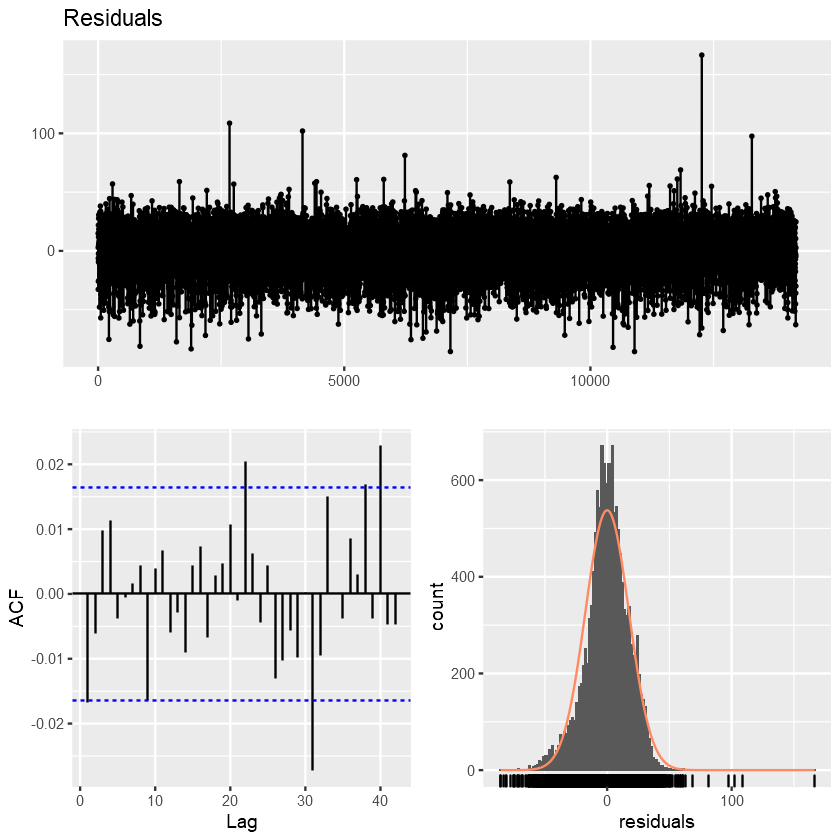

In [ ]:
checkresiduals(fit_full_reg)

As shown in the above full Regression model the Adjusted R^2 of the model is 0.74. Moreover, as shown in the Q-Q plot the higher and lower residuals significantly deviates from normality which shows the limitation of this model to correctly predict the potential outliers.

#### Accuracy Measures with train and test set validation (on test set)

In [ ]:
accuracy(predict(fit_full_reg,test.data),test.data[,"critical_temp"])

ME         RMSE    MAE      MPE       MAPE    
Test set -0.2248192 17.6209 13.31733 -1606.083 1974.942

#### Accuracy Measures with cross validation

In [ ]:
train.control <- trainControl(method = "cv", number = 10)
# Train the model
fit_full_reg_cv <- train(critical_temp ~., data = train_data[,2:82], method = "lm",
               trControl = train.control)
accuracy(predict(fit_full_reg_cv,test.data),test.data[,"critical_temp"])

ME         RMSE    MAE      MPE       MAPE    
Test set -0.1404149 17.5462 13.25685 -1573.092 1934.633

The above row shows measures of ME, RMSE, MAE, MPE & MAPE measures for the test set on the full (base) model. Moreover, it can be seen cross validation results in slightly better measures of errors.

### 3.1.2) Multipe Regression: Selected features only

Now the multiple linear regression is done based embedded (correlation) selection method.

In [ ]:
fit_sel_reg=lm(critical_temp~.,data=train.data_sel)
summary(fit_sel_reg)


Call:
lm(formula = critical_temp ~ ., data = train.data_sel)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.764 -12.044  -0.065  12.564 192.351 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.437e+01  5.452e+00  -4.470 7.90e-06 ***
wtd_std_ThermalConductivity      2.624e-01  1.291e-02  20.321  < 2e-16 ***
range_atomic_radius              1.662e-01  6.948e-03  23.921  < 2e-16 ***
wtd_mean_Valence                -3.420e+00  4.746e-01  -7.205 6.09e-13 ***
wtd_entropy_atomic_mass          3.408e+01  2.020e+00  16.870  < 2e-16 ***
range_atomic_mass                1.212e-01  6.091e-03  19.903  < 2e-16 ***
wtd_range_ThermalConductivity    4.976e-02  9.207e-03   5.405 6.58e-08 ***
wtd_range_Valence                6.158e+00  4.798e-01  12.835  < 2e-16 ***
entropy_ElectronAffinity        -2.271e+01  1.812e+00 -12.534  < 2e-16 ***
wtd_mean_Density                -3.190e-04  1.656e-04  -1.926 0.054137 .  
wtd_

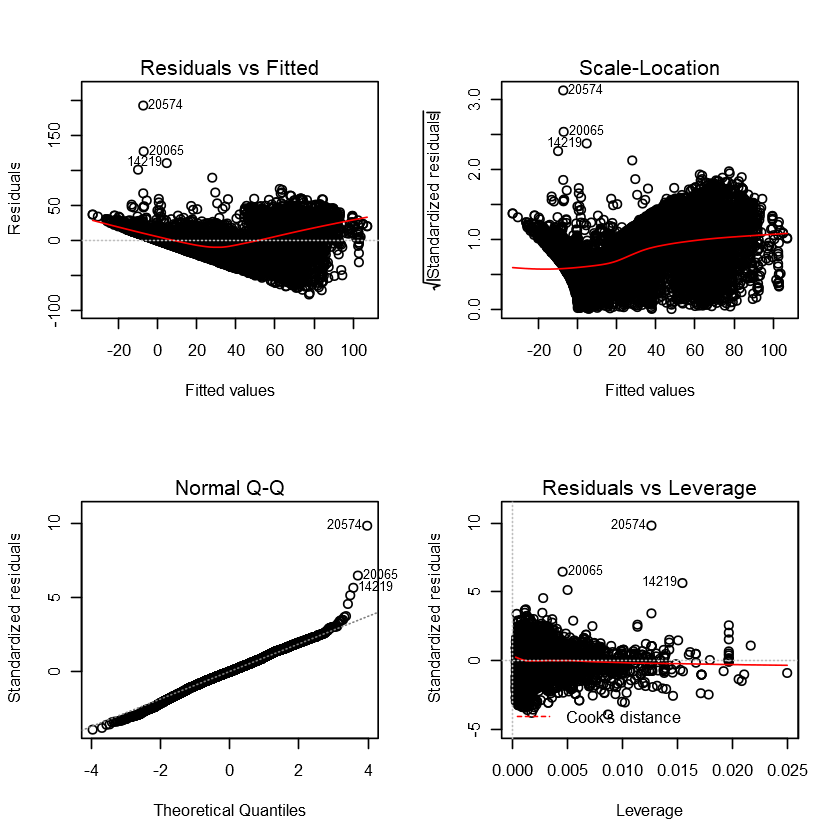

In [ ]:
par(mfcol=c(2,2))
plot(fit_sel_reg)


	Breusch-Godfrey test for serial correlation of order up to 33

data:  Residuals
LM test = 45.969, df = 33, p-value = 0.06617


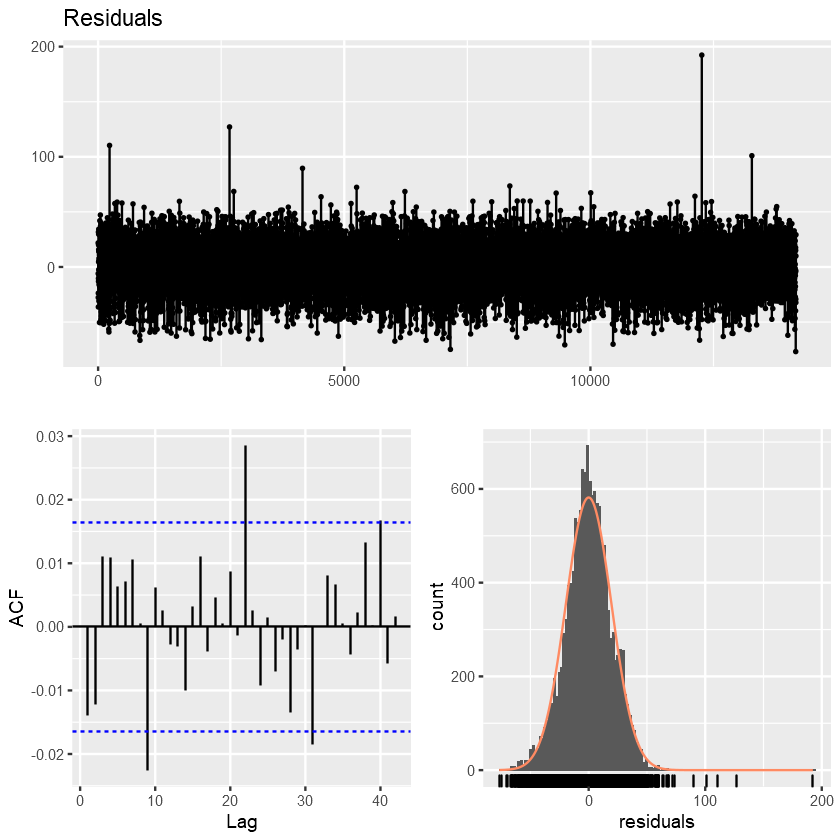

In [ ]:
checkresiduals(fit_sel_reg)

#### Accuracy Measures with train and test set validation (on test set)

In [ ]:
accuracy(predict(fit_sel_reg,test.data_sel),test.data_sel[,"critical_temp"])

ME         RMSE     MAE      MPE       MAPE    
Test set -0.3302167 19.71806 15.44803 -1544.459 2710.638

#### Accuracy Measures with cross validation

In [ ]:
train.control1 <- trainControl(method = "cv", number = 10)
# Train the model
fit_sel_reg_cv <- train(critical_temp ~., data = new_data, method = "lm",
               trControl = train.control1)
accuracy(predict(fit_sel_reg_cv,test.data),test.data_sel[,"critical_temp"])

ME         RMSE     MAE      MPE       MAPE    
Test set -0.2189204 19.70118 15.43183 -1471.524 2701.539

The above model is derived from just 29/80 features selected from the data set. It shows that the Adjusted R^2 of the chosen variables is 67% (compared to 74% of the full model) which shows that these 29 features explain the 91% of the variation explained by the full (base) model. Moreover. The Normal Q-Q plot has less diviation for lower and higher residuals for the selected features in the model which shows better fit to potential outliers. The ACF plot and accuracy measures are also just slightly worse off compared to full model. This shows that this slight improvement (as in full model) comes at high cost of increased number of dimensions (from 29 to 80).

However, these features has caused a slight decrease in R squared and other measures of errors such as RMSE, MAE, MPE and MAPE are slightly worse off so other model techniques such as XG boost and KNN techniques are tested for better representation of this low dimension feature set.

## 3.2) XG Boost

The 2nd model that is considered for this problem (with our selected feature set) is the XG boost model. This model uses gradient descent boosting technique to find an optimal solution. This strategy works best for structured (tabular) data, which was the case here, thus this strategy was employed to test our feature set.

In [ ]:
for (j in 1:70){

    fit_xgboost_sel=xgboost(data=as.matrix(train.data_sel[,-1]),label=as.matrix(train.data_sel[,"critical_temp"]),eta = 0.09,objective="reg:linear",verbose=0,nrounds=j)
    fit_xgboost=xgboost(data=as.matrix(train.data[,-1]),label=as.matrix(train.data[,"critical_temp"]),eta = 0.09,objective="reg:linear",verbose=0,nrounds=j)
    print(j)
    print(accuracy(predict(fit_xgboost_sel,as.matrix(train.data_sel[,-1])),train.data_sel$critical_temp))
    #print(accuracy(predict(fit_xgboost_sel,as.matrix(test.data_sel[,-1])),test.data_sel$critical_temp))
    #print(accuracy(predict(fit_xgboost,as.matrix(test.data[,-1])),test.data$critical_temp))
    print("********************************")
    flush.console()
}

As shown above in every iteration, all measures of errors are better than the previous measure (for both full feature set and selected feature set model) as expected from XG Boost due to its inherent ability to correct errors in the previous iteration. Using RMSE as a terminating criteria, I choose no. of iterations where delta(RMSE)<0.01. From the above output the number of iterations used is around 60.

#### XGB accuracy using train and test set validation

In [ ]:
fit_xgboost_sel=xgboost(data=as.matrix(train.data_sel[,-1]),label=as.matrix(train.data_sel[,"critical_temp"]),eta = 0.09,objective="reg:linear",verbose=0,nrounds=62)
accuracy(predict(fit_xgboost_sel,as.matrix(test.data_sel[,-1])),test.data_sel$critical_temp)

ME         RMSE      MAE       MPE       MAPE    
Test set 0.09732654 0.1572416 0.1026918 -3.872991 4.516013

#### XGB accuracy using cross validation

In [ ]:
#fit_xgboost_sel_cv=xgb.cv(data=as.matrix(new_data[,-1]),label=as.matrix(new_data[,"critical_temp"]),eta = 0.09,objective="reg:squarederror",verbose=0,nrounds=57,nfold=10,preiction=TRUE)
#temp=predict(fit_xgboost_sel_cv,as.matrix(test.data_sel[,-1]))
#accuracy(predict(fit_xgboost_sel_cv,as.matrix(test.data_sel[,-1])),test.data_sel$critical_temp)
#temp
#fit_xgboost_sel_cv

## 3.3) KNN Regression

The last model considered for this dataset is the knn regression. This algorithm makes use of k nearest neighbours for predicting the value of dependent variable (critical temperature in this case). This is a possibly good choice of model due to its unsupervised learning approach which will helpto capture non linearity in the models which are not captured by using XG Boost and Linear regression models.

In the first phase, an optimal value for KNN Regression parameter (K in this case) is first found based on minimum RMSE as below for developing our knn regression model.

In [ ]:
for(i in 1:50){
    #knn_fit=knn.reg(train.data_sel[,-1],test=test.data_sel[,-1],y=train.data_sel[,"critical_temp"],k=i)
    knn_fit=knn.reg(train.data_sel[,-1],test=train.data_sel[,-1],y=train.data_sel[,"critical_temp"],k=i)
    print(i)
    #print(knn_fit$pred)
    print("ME is:")
    #print(mean(knn_fit$pred-test.data_sel$critical_temp))
    print(mean(knn_fit$pred-train.data_sel$critical_temp))
    print("MAE is: ")
    #print(MAE(knn_fit$pred,test.data_sel$critical_temp,na.rm=TRUE))
    print(MAE(knn_fit$pred,train.data_sel$critical_temp,na.rm=TRUE))
    print("RMSE is: ")
    #print(RMSE(knn_fit$pred,test.data_sel$critical_temp,na.rm=TRUE))
    print(RMSE(knn_fit$pred,train.data_sel$critical_temp,na.rm=TRUE))
    #print(MAPE(knn_fit$pred,test.data$critical_temp,na.rm=TRUE))
    print("MAPE is: ")
    #print(mean(abs(knn_fit$pred-test.data_sel$critical_temp)/test.data_sel$critical_temp)*100)
    print(mean(abs(knn_fit$pred-train.data_sel$critical_temp)/train.data_sel$critical_temp)*100)
    print("******************************************************")
    flush.console()

}

From the above information, keeping consistent with above convention of choosing the model parameter with smallest RMSE which is k=1. But since at k=1 model will be too complex which can result in overfitting, therefore a slightly bigger value of k i.e. k=3 is choosen.

#### KNN regression with train and test set validation

In [ ]:
knn_fit=knn.reg(train.data_sel[,-1],test=test.data_sel[,-1],y=train.data_sel[,"critical_temp"],k=3)
accuracy(knn_fit$pred,test.data_sel[,"critical_temp"])

ME         RMSE     MAE      MPE       MAPE    
Test set -0.7667894 8.428382 4.330301 -933.0429 947.2866

#### KNN regression with Cross validation

In [ ]:
train.control1 <- trainControl(method = "cv", number = 10,preProcOptions=list(k=3))
# Train the model
knn_fit_cv <- train(critical_temp ~., data = new_data, method = "knn",
               trControl = train.control1)
accuracy(predict(knn_fit_cv,test.data),test.data$critical_temp)

ME         RMSE     MAE     MPE       MAPE    
Test set -0.6709359 10.11118 5.67044 -941.6173 955.8745

# 5) Conclusion

The table below shows the error measures (in Kelvin) of all Models considered for the analysis i.e. Multiple Linear regression, XG Boost and KNN Regression:

In [ ]:
errors_measure=accuracy(predict(fit_full_reg,test.data),test.data[,"critical_temp"])
errors_measure=rbind(errors_measure,accuracy(predict(fit_full_reg_cv,test.data),test.data[,"critical_temp"]))
errors_measure=rbind(errors_measure,accuracy(predict(fit_sel_reg,test.data_sel),test.data_sel[,"critical_temp"]))
errors_measure=rbind(errors_measure,accuracy(predict(fit_sel_reg_cv,test.data),test.data[,"critical_temp"]))
errors_measure=rbind(errors_measure,accuracy(predict(fit_xgboost_sel,as.matrix(test.data_sel[,-1])),test.data_sel$critical_temp))
errors_measure=rbind(errors_measure,accuracy(knn_fit$pred,test.data_sel[,"critical_temp"]))
errors_measure=rbind(errors_measure,accuracy(predict(knn_fit_cv,test.data),test.data$critical_temp))

rownames(errors_measure) <- c("full model Linear regression","full model Linear regression_CV","selected model regression","selected model regression_CV","selected model XG Boost","selected model KNN regression","selected model KNN regression_CV")

errors_measure

ME          RMSE       MAE        MPE         
full model Linear regression     -0.22481923 17.6209040 13.3173321 -1606.082945
full model Linear regression_CV  -0.14041486 17.5462022 13.2568470 -1573.091553
selected model regression        -0.33021673 19.7180576 15.4480251 -1544.458799
selected model regression_CV     -0.21892040 19.7011800 15.4318253 -1471.523827
selected model XG Boost           0.09732654  0.1572416  0.1026918    -3.872991
selected model KNN regression    -0.76678937  8.4283819  4.3303010  -933.042893
selected model KNN regression_CV -0.67093589 10.1111780  5.6704402  -941.617285
                                 MAPE       
full model Linear regression     1974.941903
full model Linear regression_CV  1934.632524
selected model regression        2710.638396
selected model regression_CV     2701.539457
selected model XG Boost             4.516013
selected model KNN regression     947.286573
selected model KNN regression_CV  955.874481

From the above table it can be concluded:

1) Each of Multiple Linear Regression, XG Boost, and KNN Regression have similar levels of Mean Errors (Residuals) in their best case.

2) Looking at RMSE, MAE, MPEand MAPE it can be seen XG Boost performs the best while Linear Regression has the worst performance in terms of the measures of errors.

3) Although the Selected Linear Regression model slightly higher RMSE and MAE compared to the base model it has comparable MPE for selected feature model compared to the base (linear) model which shows that errors are do not have significant deviations compared to the base model despite significant reduction in the dimensionality.

# 6) References

1) An Introduction to statistical learning by Gareth James.

2) R documentation XG Boost, KNN Regression

3) FUNCTIONS AND PACKAGES FOR FEATURE SELECTION IN R by Mohit (https://datasciencebeginners.com/2018/11/26/functions-and-packages-for-feature-selection-in-r/)

4) https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/

5) https://arxiv.org/pdf/1803.10260.pdf

6) https://mlr.mlr-org.com/articles/tutorial/feature_selection.html